# Data Space Report


<img src="images/polito_logo.png" alt="Polito Logo" style="width: 200px;"/>


## Pittsburgh Bridges Data Set

<img src="images/andy_warhol_bridge.jpg" alt="Andy Warhol Bridge" style="width: 200px;"/>

    Andy Warhol Bridge - Pittsburgh.

Report created by Student Francesco Maria Chiarlo s253666, for A.A 2019/2020.

**Abstract**:The aim of this report is to evaluate the effectiveness of distinct, different statistical learning approaches, in particular focusing on their characteristics as well as on their advantages and backwards when applied on a relatively small dataset as the one employed within this report, that is Pittsburgh Bridgesdataset.

**Key words**:Statistical Learning, Machine Learning, Bridge Design.

## TOC:
* [Imports Section](#imports-section)
* [Dataset's Attributes Description](#attributes-description)
* [Data Preparation and Investigation](#data-preparation)
* [Learning Models](#learning-models)
* [Improvements and Conclusions](#improvements-and-conclusions)
* [References](#references)

### Imports Section <a class="anchor" id="imports-section"></a>

In [1]:
# =========================================================================== #
# STANDARD IMPORTS
# =========================================================================== #
print(__doc__)

# Critical Imports
# --------------------------------------------------------------------------- #
import warnings; warnings.filterwarnings("ignore")

# Imports through 'from' syntax
# --------------------------------------------------------------------------- #
from pprint import pprint; from IPython.display import display; 
from itertools import islice

# Standard Imports
# --------------------------------------------------------------------------- #
import copy; import os
import sys; import time
import itertools; import ipywidgets as widgets

# Imports through 'as' syntax
# --------------------------------------------------------------------------- #
import numpy as np; import pandas as pd

# Imports for handling graphics
# --------------------------------------------------------------------------- #
%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt; import chart_studio.plotly.plotly as py
import matplotlib.image as mpimg
import seaborn as sns;  sns.set(style="ticks", color_codes=True) # sns.set()

Automatically created module for IPython interactive environment


In [2]:
# =========================================================================== #
# UTILS IMPORTS (Custom Functions Done by myself)
# =========================================================================== #
from utils.utilities_functions import *; from utils.display_utils import *
from utils.preprocessing_utils import *; from utils.learning_curves_custom import *
from utils.training_utils import *;      from utils.sklearn_functions_custom import *
from utils.training_utils_v2 import fit_by_n_components, fit_all_by_n_components, grid_search_all_by_n_components

In [3]:
# =========================================================================== #
# sklearn IMPORT
# =========================================================================== #
from sklearn.decomposition import PCA, KernelPCA
# Import scikit-learn classes: models (Estimators).
from sklearn.naive_bayes import GaussianNB, MultinomialNB # Non-parametric Generative Model
from sklearn.naive_bayes import MultinomialNB        # Non-parametric Generative Model
from sklearn.linear_model import LogisticRegression  # Parametric Linear Discriminative Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC                          # Parametric Linear Discriminative "Support Vector Classifier"
from sklearn.tree import DecisionTreeClassifier      # Non-parametric Model
from sklearn.ensemble import RandomForestClassifier  # Non-parametric Model (Meta-Estimator, that is, an Ensemble Method)

In [4]:
np.random.seed(0)

### Dataset's Attributes Description <a class="anchor" id="attributes-description"></a>

The analyses that I aim at accomplishing while using as means the methods or approaches provided by both Statistical Learning and Machine Learning fields, concern the dataset Pittsburgh Bridges, and what follows is a overview and brief description of the main characteristics, as well as, basic information about this precise dataset.

The Pittsburgh Bridges dataset is a dataset available from the web site called mainly *"UCI Machine Learing Repository"*, which is one of the well known web site that let a large amount of different datasets, from different domains or fields, to be used for machine-learning research and which have been cited in peer-reviewed academic journals.

In particular, the dataset I'm going to treat and analyze, which is Pittsburgh Bridges dataset, has been made freely available from the Western Pennsylvania Regional Data Center (WPRDC), which is a project led by the University Center of Social and Urban Research (UCSUR) at the University of Pittsburgh ("University") in collaboration with City of Pittsburgh and The County of Allegheny in Pennsylvania. The WPRDC and the WPRDC Project is supported by a grant from the Richard King Mellon Foundation.

In order to be more precise, from the official and dedicated web page, within UCI Machine Learning cite, Pittsburgh Bridges dataset is a dataset that has been created after the works of some co-authors which are:
- Yoram Reich & Steven J. Fenves from Department of Civil Engineering and Engineering Design Research Center Carnegie Mellon University Pittsburgh, PA 15213

The Pittsburgh Bridges dataset is made of up to 108 distinct observations and each of that data sample is made of 12 attributes or features where some of them are considered to be continuous properties and other to be categorical or nominal properties. Those variables are the following:

- **RIVER**: which is a nominal type variable that can assume the subsequent possible discrete values which are: A, M, O. Where A stands for Allegheny river, while M stands for Monongahela river and lastly O stands for Ohio river.


<img src="images/pittsburgh_city.jpg" alt="Pittsburgh city" style="width: 500px;"/>

- **LOCATION**: which represents a nominal type variable too, and assume a positive integer value from 1 up to 52 used as categorical attribute.
- **ERECTED**: which might be either a numerical or categorical variable, depending on the fact that we want to aggregate a bunch of value under a categorical quantity. What this means is that, basically such attribute is made of date starting from 1818 up to 1986, but we may imagine to aggregate somehow these data within a given category among those suggested, that are CRAFTS, EMERGENING, MATURE, MODERN.
- **PURPOSE**: which is a categorical attribute and represents the reason why a particular bridge has been built, which means that this attribute represents what kind of vehicle can cross the bridge or if the bridge has been made just for people. For this reasons the allowd values for this attributes are the following: WALK, AQUEDUCT, RR, HIGHWAY. Three out of four are self explained values, while RR value that might be tricky at first glance, it just stands for railroad.
- **LENGTH**: which represents the bridge's length, is a numerical attribute if we just look at the real number values that go from 804 up to 4558, but we can again decide to handle or arrange such values so that they can be grouped into range of values mapped into SHORT, MEDIUM, LONG so that we can refer to a bridge's length by means of these new categorical values.
- **LANES**: which is a categorical variable which is represented by numerical values, that are 1, 2, 4, 6 which indicate the number of distinct lanes that a bridge in Pittsburgh city may have. The larger the value the wider the bridge.
- **CLEAR-G**: specifies  whether  a  vertical  navigation clearance requirement was enforced in the design or not.
- **T-OR-D**: which is a nominal attribute, in other words, a categorical attribute that can assume THROUGH, DECK values. In order to be more precise, this samples attribute deals with structural elements of a bridge. In fact, a deck is the surface of a bridge and this structural element, of bridge's superstructure, may be constructed of concrete, steel, open grating, or wood. On the other hand, a through arch bridge, also known as a half-through arch bridge or a through-type arch bridge, is a bridge that is made from materials such as steel or reinforced concrete, in which the base of an arch structure is below the deck but the top rises above it.

<img src="images/Parts_of_a_truss_bridge.png" alt="The various parts of a truss bridge" style="width: 500px;"/>


- **MATERIAL**: which is a categorical or nominal variable and is used to describe the bridge telling which is the main or core material used to build it.
  This attribute can assume one of the possible, following values which are: WOOD, IRON, STEEL. Furthermore, we expect to see somehow a bit of correlation between the values assumed by the pairs represented by T-OR-D and MATERIAL columns, when looking just to them.
- **SPAN**: which is a categorical or nominal value and has been recorded by means of three possible values for each sample, that are SHORT, MEDIUM, LONG. This attribute, within the field of Structural Engineering, is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. 

<img src="images/span_bridge.png" alt="span bridge" style="width: 500px;"/>

- **REL-L**: which is a categorical or nominal variable and stands for relative length of the main span of the bridge to the total crossing length, it can assume three possible values that are S, S-F, F.
- Lastly, **TYPE** which indicates as a categorical or nominal attributes what type of bridge each record represents, among the possible 6 distinct classes or types of bridges that are: WOOD, SUSPEN, SIMPLE-T, ARCH, CANTILEV, CONT-T.

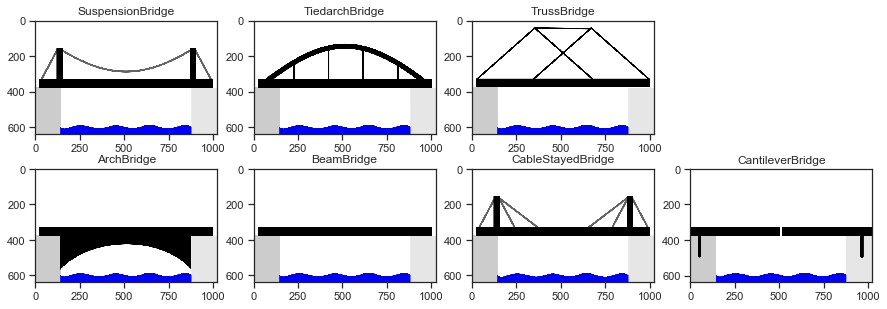

In [5]:
# Show TYPE of Bridges
# ------------------------
show_bridges_types_images()

### Data Preparation and Investigation <a class="anchor" id="data-preparation"></a>

The aim of this chapter is to get in the data, that are available within Pittsburgh Bridge Dataset, in order to investigate a bit more in to detail and generally speaking deeper the main or high level statistics quantities, such as mean, median, standard deviation of each attribute, as well as displaying somehow data distribution for each attribute by means of histogram plots. This phase allows or enables us to decide which should be the best feature to be selected as the target variable, in other word the attribute that will represent the dependent variable with respect to the remaining attributes that instead will play the role of predictors and independent variables, as well.

In order to investigate and explore our data we make usage of *Pandas library*. We recall mainly that, in computer programming, Pandas is a software library written for the Python programming language* for *data manipulation and analysis*. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software and a interesting and funny things about such tool is that the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.
We also note that as the analysis proceeds we will introduce other computer programming as well as programming libraries that allow or enable us to fulfill our goals.

Initially, once I have downloaded from the provided web page the dataset with the data samples about Pittsburgh Bridge we load the data by means of functions available using python library's pandas. We notice that the overall set of data points is large up to 108 records or rows, which are sorted by Erected attributes, so this means that are sorted in decreasing order from the oldest bridge which has been built in 1818 up to the most modern bridge that has been erected in 1986. Then we display the first 5 rows to get an overview and have a first idea about what is inside the overall dataset, and the result we obtain by means of head() function applied onto the fetched dataset is equals to what follows:

In [6]:
# Some global script variables
# --------------------------------------------------------------------------- #
dataset_path = 'C:\\Users\\Francesco\Documents\\datasets\\pittsburgh_dataset'
dataset_name = 'bridges.data.csv'

# column_names = ['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
column_names = ['RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
TARGET_COL = 'T-OR-D'

# variables used for pass through arrays used to store results
pos_gs = 0
pos_cv = 0

# Estimator to be trained
estimators_list = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), SGDClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
estimators_names = ['GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'SGDClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']

# Array used for storing graphs
plots_names = list(map(lambda xi: f"{xi}_learning_curve.png", estimators_names))

pca_kernels_list = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid']
cv_list = [10, 9, 8, 7, 6, 5, 4, 3, 2]

In [11]:
# Parameters to be tested for Cross-Validation Approach
# -----------------------------------------------------

parmas_logistic_regression = {
    'penalty': ('l1', 'l2', 'elastic'),
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'fit_intercept': (True, False),
    'tol': (1e-4, 1e-3, 1e-2),
    'class_weight': (None, 'balanced'),
    'C': (10.0, 1.0, .1, .01, .001, .0001),
    'random_state': (0,),
}

parmas_knn_clf = {
    'n_neighbors': (2,3,4,5,6,7,8,9,10),
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'manhattan'),
    'leaf_size': (5, 10, 15, 30),
    'algorithm': ('ball_tree', 'kd_tree', 'brute'),
}

parameters_sgd_clf = {
    'loss': ('log', 'modified_huber'), # ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron')
    'penalty': ('l2', 'l1', 'elasticnet'),
    'alpha': (1e-1, 1e-2, 1e-3, 1e-4),
    'max_iter': (50, 100, 150, 200, 500, 1000, 1500, 2000, 2500),
    'learning_rate': ('optimal',),
    'tol': (None, 1e-2, 1e-4, 1e-5, 1e-6),
    'random_state': (0,),
}

kernel_type = 'svm-rbf-kernel'
parameters_svm = {
    'gamma': (0.003, 0.03, 0.05, 0.5, 0.7, 1.0, 1.5),
    'max_iter':(1e+2, 1e+3, 2 * 1e+3, 5 * 1e+3, 1e+4, 1.5 * 1e+3),
    # 'penalty': ('l2','l1'),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid',],
    'C': (1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3),
    'probability': (True,),
    'random_state': (0,),
}

parmas_decision_tree = {
    'splitter': ('random', 'best'),
    'criterion':('gini', 'entropy'),
    'max_features': (None, 'auto', 'sqrt', 'log2'),
    'random_state': (0,),
}

parmas_random_forest = {
    'n_estimators': (3, 5, 7, 10, 30, 50, 70, 100, 150, 200),
    'criterion':('gini', 'entropy'),
    'bootstrap': (True, False),
    'random_state': (0,),
}

param_grids = [parmas_logistic_regression, parmas_knn_clf, parameters_sgd_clf, parameters_svm, parmas_decision_tree, parmas_random_forest]


# Some checks
# -----------------------------------------------------
N_CV, N_KERNEL, N_GS = 9, 5, 6
nrows = N_KERNEL // 2 if N_KERNEL % 2 == 0 else N_KERNEL // 2 + 1
ncols = 2
grid_size = [nrows, ncols]

In [12]:
# READ INPUT DATASET
# --------------------------------------------------------------------------- #
dataset = pd.read_csv(os.path.join(dataset_path, dataset_name), names=column_names, index_col=0)

In [13]:
# SHOW SOME STANDARD DATASET INFOS
# --------------------------------------------------------------------------- #
print('Dataset shape: {}'.format(dataset.shape))
print(dataset.info())

Dataset shape: (108, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, E1 to E109
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     108 non-null    object
 1   LOCATION  108 non-null    object
 2   ERECTED   108 non-null    int64 
 3   PURPOSE   108 non-null    object
 4   LENGTH    108 non-null    object
 5   LANES     108 non-null    object
 6   CLEAR-G   108 non-null    object
 7   T-OR-D    108 non-null    object
 8   MATERIAL  108 non-null    object
 9   SPAN      108 non-null    object
 10  REL-L     108 non-null    object
 11  TYPE      108 non-null    object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB
None


In [14]:
# SHOWING FIRSTS N-ROWS AS THEY ARE STORED WITHIN DATASET
# --------------------------------------------------------------------------- #
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


What we can notice from just the table above is that there are some attributes that are characterized by a special character that is '?' which stands for a missing value, so by chance there was not possibility to get the value for this attribute, such as for LENGTH and SPAN attributes. Analyzing in more details the dataset we discover that there are up to 6 different attributes, in the majority attributes with categorical or nominal nature such as CLEAR-G, T-OR-D, MATERIAL, SPAN, REL-L, and TYPE that contain at list one row characterized by the fact that one of its attributes is set to assuming '?' value that stands, as we already know for a missing value.

Here, we can follow different strategies that depends onto the level of complexity as well as accuracy we want to obtain or achieve for models we are going to fit to the data after having correctly pre-processed them, speaking about what we could do with missing values. In fact one can follow the simplest way and can decide to simply discard those rows that contain at least one attribute with a missing value represented by the '?' symbol. Otherwise one may alos decide to follow a different strategy that aims at keeping also those rows that have some missing values by means of some kind of technique that allows to establish a potential substituting value for the missing one.

So, in this setting, that is our analyses, we start by just leaving out those rows that at least contain one attribute that has a missing value, this choice leads us to reduce the size of our dataset from 108 records to 70 remaining samples, with a drop of 38 data examples, which may affect the final results, since we left out more or less the 46\% of the data because of missing values.

In [15]:
# INVESTIGATING DATASET IN ORDER TO DETECT NULL VALUES
# --------------------------------------------------------------------------- #
print('Before preprocessing dataset and handling null values')
result = dataset.isnull().values.any()
print('There are any null values ? Response: {}'.format(result))

result = dataset.isnull().sum()
print('Number of null values for each predictor:\n{}'.format(result))

Before preprocessing dataset and handling null values
There are any null values ? Response: False
Number of null values for each predictor:
RIVER       0
LOCATION    0
ERECTED     0
PURPOSE     0
LENGTH      0
LANES       0
CLEAR-G     0
T-OR-D      0
MATERIAL    0
SPAN        0
REL-L       0
TYPE        0
dtype: int64


In [16]:
# DISCOVERING VALUES WITHIN EACH PREDICTOR DOMAIN
# --------------------------------------------------------------------------- #
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION', 'LANES']
# columns_2_avoid = None
list_columns_2_fix = show_categorical_predictor_values(dataset, columns_2_avoid)

In [17]:
# FIXING, UPDATING NULL VALUES CODED AS '?' SYMBOL
# WITHIN EACH CATEGORICAL VARIABLE, IF DETECTED ANY
# --------------------------------------------------------------------------- #
print('"Before" removing \'?\' rows, Dataset dim:', dataset.shape)
for _, predictor in enumerate(list_columns_2_fix):
    dataset = dataset[dataset[predictor] != '?']
print('"After" removing \'?\' rows, Dataset dim: ', dataset.shape)
print('-' * 50)

show_categorical_predictor_values(dataset, columns_2_avoid)

"Before" removing '?' rows, Dataset dim: (108, 12)
"After" removing '?' rows, Dataset dim:  (88, 12)
--------------------------------------------------


[]

In [18]:
# INTERMEDIATE RESULT FOUND
# --------------------------------------------------------------------------- #
features_vs_values = preprocess_categorical_variables(dataset, columns_2_avoid)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     88 non-null     int64 
 1   LOCATION  88 non-null     object
 2   ERECTED   88 non-null     int64 
 3   PURPOSE   88 non-null     int64 
 4   LENGTH    88 non-null     object
 5   LANES     88 non-null     object
 6   CLEAR-G   88 non-null     int64 
 7   T-OR-D    88 non-null     int64 
 8   MATERIAL  88 non-null     int64 
 9   SPAN      88 non-null     int64 
 10  REL-L     88 non-null     int64 
 11  TYPE      88 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 8.9+ KB
None


In [19]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


The next step is represented by the effort of mapping categorical variables into numerical variables, so that them are comparable with the already existing numerical or continuous variables, and also by mapping the categorical variables into numerical variables we allow or enable us to perform some kind of normalization or just transformation onto the entire dataset in order to let some machine learning algorithm to work better or to take advantage of normalized data within our pre-processed dataset. Furthermore, by transforming first the categorical attributes into a continuous version we are also able to calculate the \textit{heatmap}, which is a very useful way of representing a correlation matrix calculated on the whole dataset. Moreover we have displayed data distribution for each attribute by means of histogram representation to take some useful information about the number of occurrences for each possible value, in particular for those attributes that have a categorical nature.

In [20]:
# MAP NUMERICAL VALUES TO INTEGER VALUES
# --------------------------------------------------------------------------- #
print('Before', dataset.shape)
columns_2_map = ['ERECTED', 'LANES']
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: int(x), dataset[predictor].values)))
print('After', dataset.shape)
print(dataset.info())

Before (88, 12)
After (80, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     80 non-null     int64 
 1   LOCATION  80 non-null     object
 2   ERECTED   80 non-null     int32 
 3   PURPOSE   80 non-null     int64 
 4   LENGTH    80 non-null     object
 5   LANES     80 non-null     int32 
 6   CLEAR-G   80 non-null     int64 
 7   T-OR-D    80 non-null     int64 
 8   MATERIAL  80 non-null     int64 
 9   SPAN      80 non-null     int64 
 10  REL-L     80 non-null     int64 
 11  TYPE      80 non-null     int64 
dtypes: int32(2), int64(8), object(2)
memory usage: 7.5+ KB
None


In [21]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


In [22]:
# MAP NUMERICAL VALUES TO FLOAT VALUES
# --------------------------------------------------------------------------- #
# print('Before', dataset.shape)
columns_2_map = ['LOCATION', 'LANES', 'LENGTH']    
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: float(x), dataset[predictor].values)))
# print('After', dataset.shape)    
# print(dataset.info())
# print(dataset.head(5))

# columns_2_avoid = None
# list_columns_2_fix = show_categorical_predictor_values(dataset, None)

In [23]:
result = dataset.isnull().values.any() # print('After handling null values\nThere are any null values ? Response: {}'.format(result))
result = dataset.isnull().sum() # print('Number of null values for each predictor:\n{}'.format(result))

dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E2,1,25.0,1819,2,1037.0,2.0,2,2,3,3,2,6
E5,1,29.0,1837,2,1000.0,2.0,2,2,3,3,2,6
E7,1,27.0,1840,2,990.0,2.0,2,2,3,2,2,6
E8,1,28.0,1844,1,1000.0,1.0,2,2,1,3,2,5
E9,2,3.0,1846,2,1500.0,2.0,2,2,1,3,2,5


In [24]:
dataset.describe(include='all')

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.642857,25.438571,1911.542857,2.214286,1597.657143,2.857143,1.257143,1.814286,2.071429,1.742857,1.728571,3.457143
std,0.723031,13.223347,36.010339,0.478308,780.237680,1.242785,0.440215,0.391684,0.428054,0.629831,0.797122,1.575958
min,1.000000,1.000000,1819.000000,1.000000,840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,15.250000,1891.250000,2.000000,1000.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.500000,27.000000,1915.000000,2.000000,1325.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
75%,2.000000,35.750000,1935.500000,2.000000,2000.000000,4.000000,1.750000,2.000000,2.000000,2.000000,2.000000,4.000000
max,3.000000,49.000000,1978.000000,3.000000,4558.000000,6.000000,2.000000,2.000000,3.000000,3.000000,3.000000,6.000000


### Descriptive Statistics
After having performed the inital preprocessing phase about Pittsburgh Bridge Dataset, where we have clined the dataset from missing values as well as properly coded all the features, that are attributes and variables by which our dataset is made of, in order to reflect their own nature, wheter categorical or numerical, so continuous, we go ahead doing another step further, consisting in describing features properties by means of some usefull and well know tools coming from Descriptive Statistics area, that is a branch of the Statistics id considered as a whole.

In particular we are going to exploit some features that made up statistician's toolbox such as histograms, pie charts and the like, describing also their advantages as well as some of their backwards.

In [25]:
# sns.pairplot(dataset, hue='T-OR-D', size=1.5)

__Histograms__:
the main advantage of using such a chart is that i can be employed to describe the frequencies with which single values or a subset of distict values wihtin a range occurs for a given sample of observations, independently whether such a sample is representing a part of an entire population of examples and measurements, or the population itself, reminding that usually we deal with subsets or samples obtained or randomly sampled by an entire popualtion which might be real or just hypothetical and supposed. In particualr the advantages that Histogram graphs allow us to observe looking at a sampel of records and measurements are the following:
- If the variable taken into account is a continuous variable we may decide dto discretize the range of possible values into a number of subintervals, that are also referred to as bins, and observe how the data is distributed into the different subintervals.
- In particular, continuing from above, the histogram we might see can suggest us if the sample has one or more picks, describing which are the most occuring values or the most populated subintervalls, as well as the histogram follows a bell-like shape in order to spot also whether the graphs shows greater upper-tail or lower-tail, or a positive skew and altertnatively a negaitve skew. Where, in the former case usually we knwo that that the sample of data shows a greater probability of observing data measurements from the upper side of the bell-shaped graph, otherwise from the lower side of again a bell-shapef graph.
- It is also important to say that generally speaking all these kind of observations and analyses are well suited for variables and featrues that assumes values that are continuous in nature, such as height, weight, or as in our dataset LOCATION variable
- Instead, if the variable under investigation is discrete or categorical in nature, the histogram graph is better called a bar graph and is a suitable choice for describing occourrencies or frequencies of different categories and classes, since someitmes there is not a natural order among the values such as Colors, evne if we might find a natural order as dress's sizes.

Here, what follows is the sequence of several histograms created and illustrated to describe some other characteristics of the variables by which the dataset is made as well as to show the level or type of relationship of the frequency or the occurency of each value for a given attribute with the values assumed by the target variable we have selected amongst the overall variables.

{'A': 1, 'M': 2, 'O': 3, 'Y': 4}


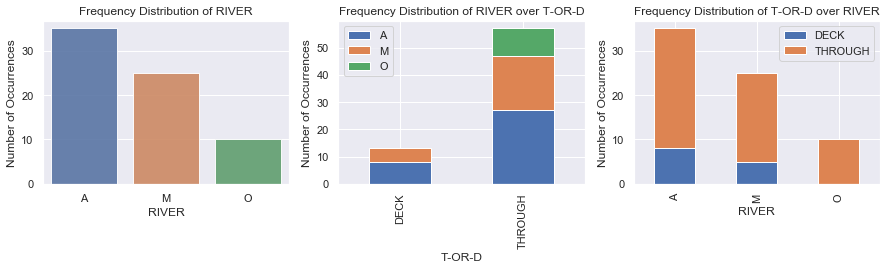

In [26]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']

show_frequency_distribution_predictor(dataset, predictor_name='RIVER', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

The Histogram related to the frequency, in other sense the occurency, of RIVER datset's feature shows us that:
- Among the three main rivers that cross the pittsburgh town, that are *Allegheny*, *Monongahela*, and *Ohio*, the one with the highest number of bridges the first Allegheny, followed by Monongahela, and finally the Ohio river whcih is also the converging river of the former two preciding rivers.
- Instead, if we depict and illustrate the occurency, of RIVER datset's feature over our target variable T-OR-D dataset's feature we can understand that among the two binary values, that are DECK and THROUGH, the second seems the most exploited floor system for building bridges between the opposite edges of the rivers. Furthermore, speaking about bridges built around Ohio river just THROUGH structural element is the only technique adopted for those bridges.
- What we can also sau about RIVER feature is that Allegheny and Monongahela show more or less the same number of bridges made from THROUGH surface, while for DECK surface Allegheny bits all the other rivers and Ohio does not figure among the rivers where there are bridges with DECK like structure at all.

{'DECK': 1, 'THROUGH': 2}


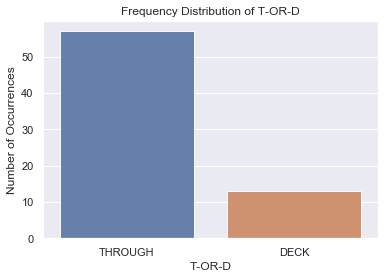

In [27]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='T-OR-D', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values)

{'G': 1, 'N': 2}


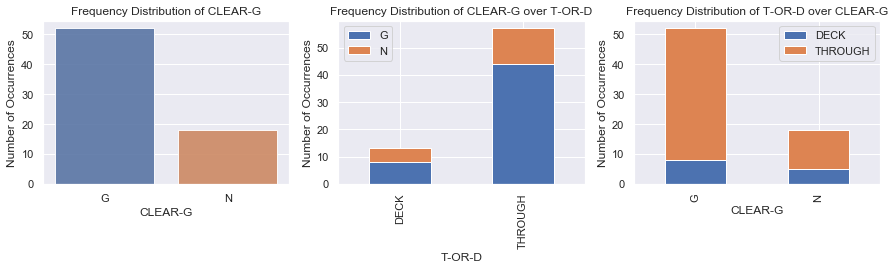

In [28]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='CLEAR-G', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL)

Instead looking at CLEAR-G feature we can notice that the *Vertical Clearance for navigation* is allowed for the majority of the bridges and when looing at the relationship of such a feature with the T-OR-D target variable we can see that THROUGH technology is the most adopted amongst the both the bridges that have or not gained the vertical Clearance for navigation, and in particular the THROUCH system is far more popular than DECK surface system in both G and N bridges, recalling us how the THROUGH technique become so important and widely spread across time and space while speaking about bridge constructing.

{'LONG': 1, 'MEDIUM': 2, 'SHORT': 3}


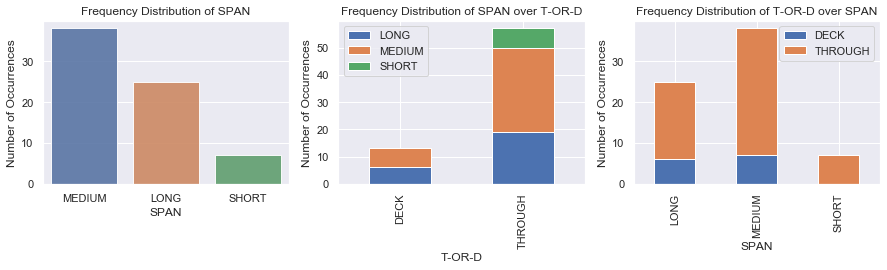

In [29]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='SPAN', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL)

Span is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. With such a definition kept in mind what we can undestand is that:
- looking at the histogram graph about Occurency distribution of Bridge SPAN feature is that, since the three rivers are conisdered to be large riversa long most of their length considering the portion of them that cross the city of Pittsburgh, it becomes natural to observe that MEDIUM Span samples are the most occurring examples, while SHORT Span samples are the least frequent records and LONG span samples range in the between but  seems to reach more closely the MEDIUM Span records.
- As usual, also here, we continue to observe that THROUGH brdiges are the ind of bridges analysing the T-OR-D feature that collect the majority of samples, while DECK bridges are just characterized by brdiges with LONG or MEDIUM Span feature and no SHORT span.
- Moreover, the ration between DECK and THROUGH reaches more or less 1 over 5, that is every 5 THROUGH bridges we find a DECK bridge with either LONG or MEDIUM Span elements.

{'IRON': 1, 'STEEL': 2, 'WOOD': 3}


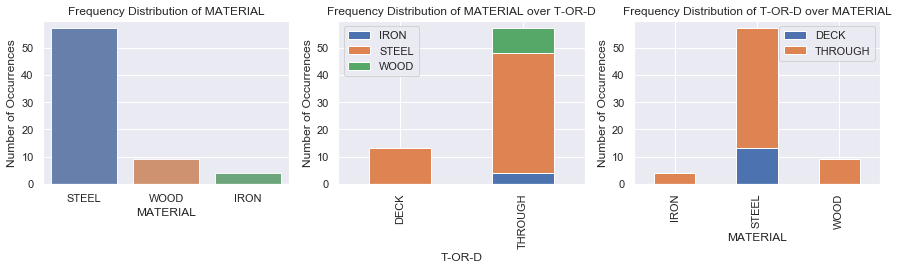

In [30]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='MATERIAL', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL)

In the histohram graph illustrated above, we can clearly understand that:
- the STELL element is the most frequently exploited material for building bridges due to its strengthen and its restinance to the corrosion caused by the surrounding environment, while WOOD-like bridges are still present they are far less frequent than STEEL-like bridges but still have better properties than IRON bridges that are least frequent bridges since Iron leads to heavier bridges and Iron requires more extensive maintanance than Steel bridges and have less elastic properties than Wood brdiges.
- However, THROUGH-like bridges are the kind of bridges that present istances that have all examples of bridges with all the available materials that the dataset has shown, while DECK-like bridges exploit just Steel material for building bridges.

{'F': 1, 'S': 2, 'S-F': 3}


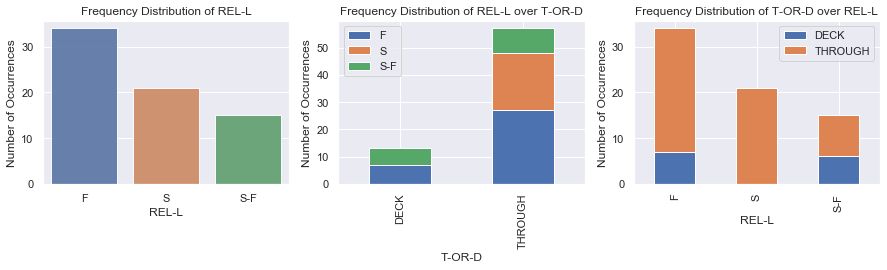

In [31]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='REL-L', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL)

We knwo that The REL-L property is the relative length of the main span to the total crossing length. With this short notion about such a feature in mind, what we can suggest observing ther first histogram depicted above is that:
- FULL kind of Bridge, shortly *F*, is the most frequent example of feature of the Pittsburgh bridges, also, the Through system is the bridge system that the most exploit or is characterized by FULL REL-L property
- The, SMALL kind of Bridge, shortlu *S* is the second property in number of instances that show such a feature among the bridges and it is only a kind of feature shown only from THROUGH-like bridges, this means that we do not find bridges that show such a property amongs the DECK-like bridges.
- Lastly, an intermediate solution, represented by SMALL-FULL property, shortly *S-F*, is more or less present in both type of bridges that are classified with DECK or THROUGH system speaking about T-OR-D attribute.

{'ARCH': 1, 'CANTILEV': 2, 'CONT-T': 3, 'SIMPLE-T': 4, 'SUSPEN': 5, 'WOOD': 6}


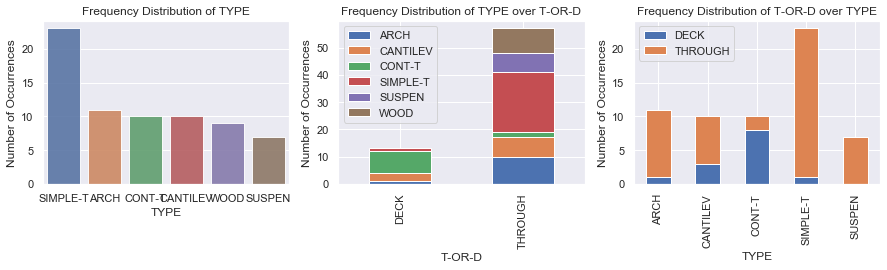

In [32]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='TYPE', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL)

Lastly, we have to speak about the TYPE feature, which is an attribute that refers to the kind of architecture or strucutre used for building the final shape of the bridges. Looking at the first picture above, that is the first Histogram, what we can notice is that:
- SIMPLE-T architecture is the most frequent kind of shape or strucutre adopted to build brdiges amongs the pittsburgh bridges, than it is folowed by ARCH-like brideges.
- Howevere, starting from the ARCH-like brideges and going ahead considering the other remaining kind of technique for giving a strucuture to a bridge, what we can undestand is that these attribute are more or less distrubuted equally, instead SIMPLE-T shows the highest value to refer to the number of instances characterized by SIMPLE-T value for this attribute within the datast.
- Furthermore, DECK-like Birdges are just characterized by up to 4 out of 7 possible values for TYPE attribute, while THROUGH-like bridges show examples of istances from all of the possible kind of architectures for building a bridge.

### Correlation Matrix Analysis

In fields of statistics as well as statistical learning, where the latter comes partly from the former, _correlation matrix_ is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
Key decisions to be made when creating a correlation matrix include: choice of correlation statistic, coding of the variables, treatment of missing data, and presentation.
Typically, a correlation matrix is square, with the same variables shown in the rows and columns.

__Applications of a correlation matrix__:
there are three broad reasons for computing a correlation matrix:

- To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
- To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
- As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

__Treatment of missing values__:
the data that we use to compute correlations often contain missing values. This can either be because we did not collect this data or don’t know the responses. Various strategies exist for dealing with missing values when computing correlation matrixes. A best practice is usually to use _multiple imputation_. However, people more commonly use _pairwise missing values_ (sometimes known as partial correlations). This involves computing correlation using all the non-missing data for the two variables. Alternatively, some use _listwise deletion_, also known as case-wise deletion, which only uses observations with no missing data. Both pairwise and case-wise deletion assume that data is missing completely at random.

In [33]:
corr_matrix = dataset.corr()

__Coding of the variables__: if you also have data from a survey, you'll need to decide how to code the data before computing the correlations. Changes in codings tend to have little effect, except when extreme.

__Presentation__:
when presenting a correlation matrix, you'll need to consider various options including:

- Whether to show the whole matrix, as above or just the non-redundant bits, as below (arguably the 1.00 values in the main diagonal should also be removed).
- How to format the numbers (for example, best practice is to remove the 0s prior to the decimal places and decimal-align the numbers, as above, but this can be difficult to do in most software).
- Whether to show statistical significance (e.g., by color-coding cells red).
- Whether to color-code the values according to the correlation statistics (as shown below).
- Rearranging the rows and columns to make patterns clearer.

This shows correlations between the stated importance of various things of attributes used to describe records, examples, and samples within bridge dataset. The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. This matrix is symmetrical, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.

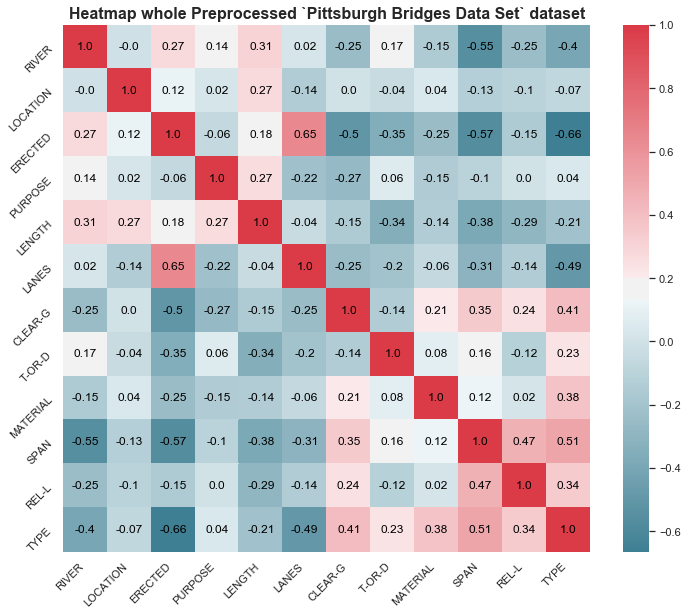

In [34]:
display_heatmap(corr_matrix)

This kind of presentation allows us, once we choose a row number and column number let's say _ith-row_ and _jth-column_, we can check locally the value assigned by the correlection factor to the pair made from to distinct features if _"i"_ strctly different from _"j"_. As an instance, what we can suggest observing the correlation matrix depicted just above, as well as exploting some common properties of symmetic and square matrices, is that:
- along the area that spread near the main diagonal the resulting features pairs seemes to either positively moderately correlate or positively waekly correlate.
- Convercely, along the area that spreads near the anti-diagonal matrix the resulting features pairs seems to instead either negatively moderately correlate or negatively waekly correlate.

Finally, as examples, in order to exploit the fact that we can access directly to the correlaction valuecomputed by means the math formula provided by the expression of correlation facotr, we can say that:
- the pair represented by ERECTED and LANES (3d-row, 6th col) features seems to moderately positively correlate, with a value equals to 0.65. This is also reasoable since that by the time while the Pittsburgh city was growing in size also the need of more infrastructures and building for working and let the people in town to leave, lead to increase in winde the different bridges to manage the traffic from and to the city.
- on the other hand, still speaking about ERECTED feature, when it is coupled with TYPE feature (3d-row, 12th col) we see in contrast that them are characterized by a negative value of correlation that lead to interprete the pair as negatively moderately correlated. The principal reason about such a behavior may be imputed by the observation that through the different years the building techniques and technologies have been employed to constrcut better, stronger bridges abandoning oldest techniques which instead imply the exploitation of less technological materials sucha s wood that requires instead more frequently maintenance tasks.

### Pie chart as a continuation of Correlation Matrix Analysis

Here, within this subsequent section, I'm going to discuss and analyse the usefulness of exploiting piec-chart like graphs for describing some features or beahvior of correlation matrix values.

The first pie chart followed by also a realted histogram both aim at explaining and depicting how the features pairs are distributed among the three main subintervals that are named weak, moderate and strong as facotrs to label the kind of correlation the value of correlation referrend to a given pair represent, which interval are the following:
- weak, if $p_{ith}$: $p_{ith} \leq .5$
- moderate, if $p_{ith}$: $.5 < p_{ith} < .8$
- strong, if $p_{ith}$: $p_{ith} \geq .8$

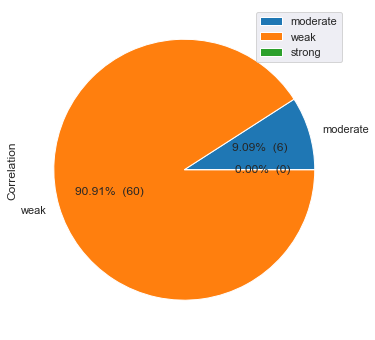

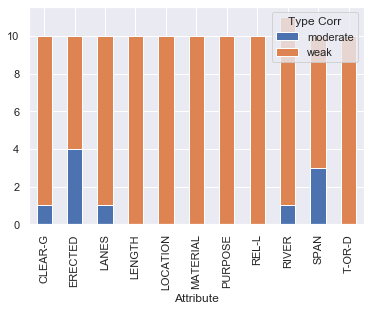

In [35]:
colors=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:brown", "tab:purple"]
data_norm, data = prepare_data_corr_matrix_pie(corr_matrix)
show_pie_chart_corr_matrix(data, colors[:3])
data, data_2 = prepare_data_corr_matrix_hist(corr_matrix)
show_stack_histogram_corr_matrix(data, data_2, corr_matrix, colors[:3])

The insight that we can understand is that up to nearly 90.90% of pairs of features is weakly correlated and just 9.09% is moderately correlated, without performing any finer distinction among positively or negatively correlated in each group. While we can notice that no pair is strongly correlated. Moreover, looking at the related histogram, just illustrated below the pie chart, we can clearly understand that just 5 over 12 features are showing also a moderate correlation patterns, which are: CLER-G, ERECTED, LANES; RIVER, and SPAN. Furthermore, we can end up saying that among those 5 features just ERECTED and SPAN shw the larger number of pairs in which them moderately correlate. instead in the majority of cases the possible pairs of features in large measure seem to weakly correlate.

The other two graphs, the first a pie chart and the second a histogram are a kind of zoom in of the other two graphs illustrated in the paragraphs above. In particular those two subsequents graphs aim at exploring in a deeper way the difference about correlation factor, taking into account also the positivness, or convercely the negativness of the kind of correlation, and so not just the information about the strongness in absolute value of the correlation factor.

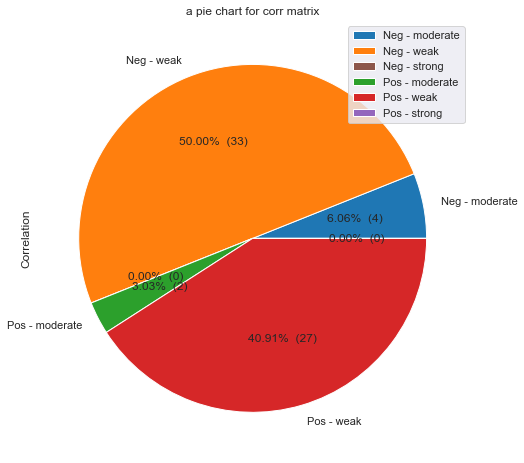

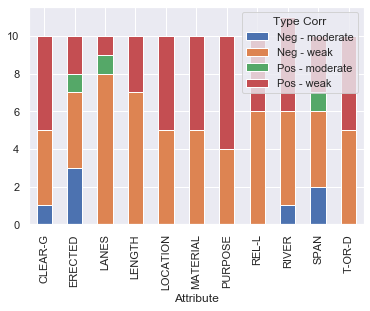

In [36]:
data_norm, data = prepare_data_corr_matrix_pie_finer_analysis(corr_matrix)
show_pie_chart_corr_matrix_finer_analysis(data, colors)
colors=["blue", "orange", "green", "red", "purple", "brown"]
data, data_2 = prepare_data_corr_matrix_hist_v2(corr_matrix)
show_stack_histogram_corr_matrix(data, data_2, corr_matrix, colors)

What we can understand analysing the two graphs is that the pie chart allows us to see that the features seems to be more negatively weakly correlated than positively weakly correlated, and following from the prior pie chart, also here the weak correlation dominates over the other kinds or strengthen of correlations, that are the remaining moderate and strong ones. In particualr negative weak correlation rises up to nearly 50% and positive weak correlation reaaches up to 40%, in other words, the latter is more or less 10 percentage point less than the former.

While from the bar chart obtained from a histogram partly related to the pie chart that is above, we can undestand that, considering the same set of featrues which also show a bit of moderate correlation - that are CLER-G, ERECTED, LANES; RIVER, and SPAN - only three up to five of them show also somehow a little positive moderate correlation with some features, while the others mostly show a positive moderate correlation

In [37]:
# get Target Values
# --------------------------------------------------------------------------- #
columns = dataset.columns

y = np.array(list(map(lambda x: 0 if x == 1 else 1, dataset[TARGET_COL].values)))
X = dataset.loc[:, dataset.columns != TARGET_COL].values

print(f"Target value {TARGET_COL}, summary:", "-" * 50, sep="\n")
print(dataset[TARGET_COL].value_counts())
# Standardizing the features
# --------------------------------------------------------------------------- #
scaler_methods = ['minmax', 'standard', 'norm']
scaler_method = 'standard'
rescaledX = preprocessing_data_rescaling(scaler_method, X)

Target value T-OR-D, summary:
--------------------------------------------------
2    57
1    13
Name: T-OR-D, dtype: int64
shape features matrix X, after normalizing:  (70, 11)


In [38]:
# sns.pairplot(dataset, hue=TARGET_COL, height=2.5);

### Pricipal Component Analysis

After having investigate the data points inside the dataset, I move one to another section of my report where I decide to explore examples that made up the entire dataset using a particular technique in the field of statistical analysis that corresponds, precisely, to so called Principal Component Analysis. In fact, the major objective of this section is understand whether it is possible to transform, by means of some kind of linear transformation given by a mathematical calculation, the original data examples into reprojected representation that allows me to retrieve most useful information to be later exploited at training time. So, lets dive a bit whitin what is and which are main concepts, pros and cons about Principal Component Analysis.

Firstly, we know that **Principal Component Analysis**, more shortly PCA, is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called *principal components*. This transformation is defined in such a way that:
- the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible),
- and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

The resulting vectors, each being a linear combination of the variables and containing n observations, are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

PCA is mostly used as a tool in *exploratory data analysis* and for making predictive models, for that reasons I used such a technique here, before going through the different learning technique for producing my models.

#### Several Different Implementation

From the theory and the filed of research in statistics, we know that out there, there are several different implementation and way of computing principal component analysis, and each adopted technique has different performance as well as numerical stability. The three major derivations are:
- PCA by means of an iterative based procedure of extraing pricipal components one after the other selecting each time the one that account for the most of variance along its own axis, within the remainig subspace to be derived.
- The second possible way of performing PCA is done via calculation of *Covariance Matrix* applied to attributes, that are our independent predictive variables, used to represent data points.
- Lastly, it is used the technique known as *Singular Valued Decomposition* applied to the overall data points within our dataset.

Reading scikit-learn documentation, I discovered that PCA's derivation uses the *LAPACK implementation* of the *full SVD* or a *randomized truncated SVD* by the method of *Halko et al. 2009*, depending on the shape of the input data and the number of components to extract. Therefore I will descrive mainly that way of deriving the method with respect to the others that, instead, will be described more briefly and roughly.

#### PCA's Iterative based Method
Going in order, as depicted briefly above, I start describing PCA obtained by means of iterative based procedure to extract one at a time a new principal componet explointing the data points at hand.

We begin, recalling that, PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

We suppose to deal with a data matrix X, with column-wise zero empirical mean, where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature.

From a math poitn of view, the transformation is defined by a set of p-dimensional vectors of weights or coefficients $\mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector $\mathbf{x}_{(i)}$ of X to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{l})_{(i)}}$, given by: ${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}$.

In this way all the individual variables ${\displaystyle t_{1},\dots ,t_{l}}$ of t considered over the data set successively inherit the maximum possible variance from X, with each coefficient vector w constrained to be a unit vector.

More precisely, the first component In order to maximize variance has to satisfy the following expression:

${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$

So, with $w_{1}$ found, the first principal component of a data vector $x_{1}$ can then be given as a score $t_{1(i)} = x_{1} ⋅ w_{1}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, $(x_{1} ⋅ w_{1})w_{1}$.

The others remainig components are computed as folloes. The kth component can be found by subtracting the first k − 1 principal components from X, as in the following expression:

- ${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$

- and then finding the weight vector which extracts the maximum variance from this new data matrix  ${\mathbf {w}}_{{(k)}}={\underset {\Vert {\mathbf {w}}\Vert =1}{\operatorname {arg\,max}}}\left\{\Vert {\mathbf {{\hat {X}}}}_{{k}}{\mathbf {w}}\Vert ^{2}\right\}={\operatorname {\arg \,max}}\,\left\{{\tfrac {{\mathbf {w}}^{T}{\mathbf {{\hat {X}}}}_{{k}}^{T}{\mathbf {{\hat {X}}}}_{{k}}{\mathbf {w}}}{{\mathbf {w}}^{T}{\mathbf {w}}}}\right\}$

It turns out that:
- from the formulas depicted above me get the remaining eigenvectors of $X^{T}X$, with the maximum values for the quantity in brackets given by their corresponding eigenvalues. Thus the weight vectors are eigenvectors of $X^{T}X$.
- The kth principal component of a data vector $x_(i)$ can therefore be given as a score $t_{k(i)} = x_{(i)} ⋅ w_(k)$ in the transformed co-ordinates, or as the corresponding vector in the space of the original variables, $(x_{(i)} ⋅ w_{(k)}) w_{(k)}$, where $w_{(k)}$ is the kth eigenvector of $X^{T}X$.
- The full principal components decomposition of X can therefore be given as: ${\displaystyle \mathbf {T} =\mathbf {X} \mathbf {W}}$, where W is a p-by-p matrix of weights whose columns are the eigenvectors of $X^{T}X$.

#### Covariance Matrix for PCA analysis

PCA made from covarian matrix computation requires the calculation of sample covariance matrix of the dataset as follows: $\mathbf{Q} \propto \mathbf{X}^T \mathbf{X} = \mathbf{W} \mathbf{\Lambda} \mathbf{W}^T$.

The empirical covariance matrix between the principal components becomes ${\displaystyle \mathbf {W} ^{T}\mathbf {Q} \mathbf {W} \propto \mathbf {W} ^{T}\mathbf {W} \,\mathbf {\Lambda } \,\mathbf {W} ^{T}\mathbf {W} =\mathbf {\Lambda } }$.


#### Singular Value Decomposition for PCA analysis

Finally, the principal components transformation can also be associated with another matrix factorization, the singular value decomposition (SVD) of X, ${\displaystyle \mathbf {X} =\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}}$, where more precisely:
- Σ is an n-by-p rectangular diagonal matrix of positive numbers $σ_{(k)}$, called the singular values of X;
- instead U is an n-by-n matrix, the columns of which are orthogonal unit vectors of length n called the left singular vectors of X;
- Then, W is a p-by-p whose columns are orthogonal unit vectors of length p and called the right singular vectors of X.

factorizingn the matrix ${X^{T}X}$, it can be written  as:

${\begin{aligned}\mathbf {X} ^{T}\mathbf {X} &=\mathbf {W} \mathbf {\Sigma } ^{T}\mathbf {U} ^{T}\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\Sigma } ^{T}\mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\hat {\Sigma }} ^{2}\mathbf {W} ^{T}\end{aligned}}$

Where we recall that ${\displaystyle \mathbf {\hat {\Sigma }} }$ is the square diagonal matrix with the singular values of X and the excess zeros chopped off that satisfies ${\displaystyle \mathbf {{\hat {\Sigma }}^{2}} =\mathbf {\Sigma } ^{T}\mathbf {\Sigma } } {\displaystyle \mathbf {{\hat {\Sigma }}^{2}} =\mathbf {\Sigma } ^{T}\mathbf {\Sigma } }$. Comparison with the eigenvector factorization of $X^{T}X$ establishes that the right singular vectors W of X are equivalent to the eigenvectors of $X^{T}X$ , while the singular values $σ_{(k)}$ of X are equal to the square-root of the eigenvalues $λ_{(k)}$ of $X^{T}X$ . 

At this point we understand that using the singular value decomposition the score matrix T can be written as:

$\begin{align} \mathbf{T} & = \mathbf{X} \mathbf{W} \\ & = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T \mathbf{W} \\ & = \mathbf{U}\mathbf{\Sigma} \end{align}$

so each column of T is given by one of the left singular vectors of X multiplied by the corresponding singular value. This form is also the polar decomposition of T.

Efficient algorithms exist to calculate the SVD, as in scikit-learn package, of X without having to form the matrix $X^{T}X$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix

In [39]:
n_components = rescaledX.shape[1]
pca = PCA(n_components=n_components) # pca = PCA(n_components=2)
pca = pca.fit(rescaledX)
# X_pca = pca.fit_transform(X)
# X_pca = pca.transform(rescaledX)

In [40]:
print(f"Cumulative varation explained(percentage) up to given number of pcs:")

tmp_data = []
principal_components = [pc for pc in '2,3,4,5,6,7,8,9,10,11'.split(',')]
for _, pc in enumerate(principal_components):
    n_components = int(pc)
    
    cum_var_exp_up_to_n_pcs = np.cumsum(pca.explained_variance_ratio_)[n_components-1]
    # print(f"Cumulative varation explained up to {n_components} pcs = {cum_var_exp_up_to_n_pcs}")
    # print(f"# pcs {n_components}: {cum_var_exp_up_to_n_pcs*100:.2f}%")
    tmp_data.append([n_components, cum_var_exp_up_to_n_pcs * 100])

tmp_df = pd.DataFrame(data=tmp_data, columns=['# PCS', 'Cumulative Varation Explained (percentage)'])
tmp_df.head(len(tmp_data))

Cumulative varation explained(percentage) up to given number of pcs:


,# PCS,Cumulative Varation Explained (percentage)
0,2,47.738342
1,3,58.892224
2,4,67.934389
3,5,75.856460
4,6,82.615768
5,7,88.413903
6,8,92.661938
7,9,95.976841
8,10,98.432807
9,11,100.000000


In [41]:
n_components = rescaledX.shape[1]
pca = PCA(n_components=n_components) # pca = PCA(n_components=2)

pca = pca.fit(rescaledX) #X_pca = pca.fit_transform(X)
X_pca = pca.transform(rescaledX)
    
fig = show_cum_variance_vs_components(pca, n_components)
# py.sign_in('franec94', 'QbLNKpC0EZB0kol0aL2Z')
# py.iplot(fig, filename='selecting-principal-components {}'.format(scaler_method))

#### Major Pros & Cons of PCA



## Learning Process <a class="anchor" id="learning-models"></a>

Here in this section we are going to partly describy and in the remaining to test and evaluate performance of various machine learning models that we selected and adopted to built up learning models for accomplishing supervised machine learning tasks related to classification problems. More precisely, we focused on binary classification problemsa, since the target variables, that is T-OR-D feature, amongst the 12 features from which the dataset is made of, and from which the more or less hundered of records are described, is a binary categorical feature which can assume the two values represented by labels DECK and THROUGH describing in two distinct manner a property about each bridge within the dataset, that property refers to the system used for constructing the bridge surface, that is commonly called deck, for let veicheles or trains or whatevert to cross the rivers that are three distinct rivers: A, M, O. Where A stands for Allegheny river, while M stands for Monongahela river and lastly O stands for Ohio river.

Before describing the fine tuning process applied to the different models accordingly to their own major properties, characteristics and features, we have decided and established to test each model performance by looking at how well all of them is going just exploiting the default setting and runnng cross-validation protocol, in other word also referred to as policy, to check the accuracy level, as ana instance and some other metrics.

To be more detailed we follow the common machine leaning working flow, that requires to split the data set, after having preprocessed it properly and in a suitable manner to meet mahcine learning models needs, into subsets commonly referred  to as training set and test set. Where, the former is exploited to build up a inference model and the latter is used to check model's performance as weel as behavior up on held out sample of istances never seen before and so those examples that the learning model wasn't provided with to learn weights and select right hyper-params to plug in back into model at the end of training procedure, in order to later test the model with the found weights as well as hyper-parameters and if it meet our requirements in terms of performance values reached at test time, then it will be ready for deployments.

<img src="images/machine_learning_workflow_2.png" alt="machine learning workflow" style="width: 400px;"/>

As we can see from the image just above what we have to do, following the purposed machine learning scheme or work flow are the subsequent steps:

__(1) Split Dataset into Train and Test sets__:
After having done with preprocessing phase we separate or divide the dataset into training set and test set, where usually the training set is bigger than the test set, and in some cases  the test set, for recording some kind of performance measures, can be made of just a single instance against which the model will be tested and checked.

__(2) Split Train set into smaller Train set and a Validation set__:
Once  have made the first split then we hold out a part for later checking the test set and we focus on training set. In fact once we have selected a machine learning model amongst those we want to adopt to fit a model and compare the results obtained we try to indentify the best fit parameters to setting the model with them. To reach such a goal we can adopt different aproaches to split further the training set into a validation set and a smaller train set in order to emulate before doing test phase a possible beahvior of the trainng model once we think it is ready for the following phase that is test step.
There are several procedure for establishing how to divide training set into two new subsets, that are validation and a little bit smaller train set, where all of them are also connected or reffered to a learning algorithm called cross-validation which consists roughly speaking into testing the model against a smaller portion of training set in order to record and measure the performance of a model before saying we are ready to proceed with test phase. Among the existing Cross-Validation Procedure we adopt and so describe briefly the following:
- **K-fold Cross-Validation**: which is a cross validation protocol exploited so that we split the training set into K-folds, in other words K-subsets all of the same size, a part eventually the last one which will be the remainder set of samples. One at a time the K-fold are left out and the model is firstly trained against K-1 subsets(folds) and then test against the left out fold for recording the performanc. At the end of the k-times we have trained the model we have recorded the performance measures and we so can average the results and understand how model in average is well doing. In oder words we can either assume the mean value as the driving value to assume the model as satisfying our constraint on performance measures or adopt the best result amongst the k-trains as the settings for hyper-params to adopt. This procedure is feasible and suitable if we do not carea botu the fact that, in cases of classification tasks, the categories might be balanced or not in terms of number of instances, as well as, it can be adopted also if we want to show a learning curve and some other performance graphics or schemes as Confusion matrtices and ROC or recall-precision curves. Latly usual values for K are: 5, 10, 20.
<img src="images/machine_learning_workflow/cross_validation.png" alt="cross validation machine learning workflow" style="width: 400px;"/>
- **Leave One Out Cross-Validation**: It is a special case of the K-fold Cross-Validation. In fact, instead of adopting the usual values as 5, 10, 20, for K as the number of possible subsets, we establish to identify each single instance as a possible fold. It's clear that this algorithm requires more time to be completed and does not allow to show up the graphics cited just above, since we do not enough data for confusion matrix and ROC or recall-precision curves.
- **Stratified Cross-Validation**: It is a good compromise when the dataset is still large enough to be exploited for training purposes but we decide to split into K-folds the traning set such that each subset have the same proportion of samples coming from the differn classes. This operation reveals to be necessary or even mandatory when we detect that the dataset does not show the same number of samples, more or less, for each class, in other word when the dataset is unbalanced for a given attribute that is the target attribute. This means that, while trying to mitigate the issue about the unbalanced dataset we thunk as well as hope that this management let the model to fit a model which will not be affected heavily just from the most numerous class, bus still learn how to classify the samples coming from the other less numerous classes, without too mcuh misclassifying errors. As usual also with Stratified Cross-Validation we are able to show same graphics as with plain K-fold Cross-Validation, the difference is that the folds are not randomly sampled from the original training set, but yet are sampled in the same proportion per each class in order to have the same number of samples for each class inside each fold.

We try out all of the three described cross-validation techniques to measure how weel default settings for different models are doing to gaina a base line against wich compare later results coming from fine tuning process carried out exploiting grid search technique for selecting the best combinatin of purposed values for each candidate machine learning technique.

__(3) Grid Search approach__: is the technique adopted when taking into account one at a time all the machine learning algorithm for selecting the best set of hyper-parameters. It consists into defining for each model a grid of possible values for different hyper-parameters that in some sense represent our degree of freedom referred to some of the properties that characterize all the different models. The grid of values might be real number ranging within a more or less interval, or a string value used to trigger a certain feature of a model combined with other related aspects of the machine learning algorithm of the given model. We recall that the standard grid search will proceed until all possible combination of provided values have been test and training with such settings have been carried out. Opposite to classic grid search it is another technique called Random Grid Search, which implies instead to let a model to choose or sample randomly the hyper-parameters within the ranges or intervals related to each hyper-params. The latter technique can be potentially less expensive since we test a reduced number of combination but might be sub-optimal even if the results can be still acceptable and meaningful.


<img src="images/machine_learning_workflow/grid_search.png" alt="grid search" style="width: 400px;"/>

__(4) Metrics and model performance's evaluation tools__: before deploying we have to test our model against a test set, that is a subset created or obtained from overall dataset which was, after preprocessing phase that turns feature values somehow into numbers, devided into two distinct sets generally of different size. The test set evaluation implies exploiting some metrics such as Accuracy, but yet there exist several others that partly are derived from confusion matrix evaluation tool, such as Precsio, Recal F1-score, and the like.

So what we understand is that we can make use of a bouch of metrics but rather than using directly those metrics we can explore model's performance by means of more useful tools such as Confusion Matrix, Roc curve in order to better understanding model's behavior when fed with unobserved new samples, as well as, how to set a threshold for determing when a target variable will suggest us that the classified sample belong to one class or the other. So, here we briefly describe which instruments we exploit to measure model's peformance starting from confusion matrix and moving ahead toward ROC curve.

**Confusion Matrix**: in statistics a confusion matrix it's a grid or matrix of numbers and in the simplest scenario, correspoding to a binary classification task, it aims at showing how well a model was going when applied onto unknow or preiviously unseen data points and  samples, in the following manner. Arbitrary we establish that along the rows we have the fraction of samples that the model has calssified or has assigned to agiven class, and so the rows account for *Predicted valuers*. Vice versa, along the columns we have the total number of samples for each class that all together resemble the so called *Actual Values* as we illustrate in the picture just below:
<img src="images/machine_learning_workflow/confusion_matrix.png" alt="confusion matrix example" style="width: 400px;"/>
So, such a table of numbers allows us to measure the fraction of correctly classified examples belonging to the Positive class, also referred to as *True Positive(TP)* or to the Negative class, also named *True Negative(TN)* and at the same time we can derive also the fractions of wrongly classified Positive samples and Negative ones, respectively knwon as *False Positve(FP)* and *False Negative (FN)*. It is clear that looking at the diagonal matrix we can undestand that the larger the value along the diagonal the better the model was able to correctly identify the samples accordingly to their own actual class.
From the four statistics measure depiceted above, that are TP,TN, FP, and FN, by the time have been dirved other useful metrics that can be exploited when the most used and well knwon measurement performance of accuracy is not enough due to the fact as an instance we wanto to analyze deeper our model behavior toward optimization of some goal or because we have to deal with dataset which are not balanced through classes to be predicted and so we wanto some other metrics to ensure the goodness of our solutions.

**Roc Curve**: for the reason cited some lines earlier by exploiting the four basis metrics have been developed other useful tools for ensuring the goodness of a solution, among those tools we decide to adopt the following one, knwon as Roc Curve. It is a curve, whose acronim stands for Receiver Operating Curve, largely employed in the field of *Decison Theory* and aims at finding, siggesting or showing how moedl's performance varywhen we are going to set different thresholds for a simple scenario in which we are going to solve a binary classification problem. Such a curve require to show on the x-axis the fraction of samples corresponding to *False Positve Rate (FPR)* at a different values of the model's hyper-params corresponding to threshold set for classifying items at inference time, as well as on the x-axis the fraction of samples corresponding to *True Positive Rate(TRP)* in order to plot a curve that originates at coordinates (0,0) and terminates at coordinates (1,1), varying in the middle accordingly to the pairs of values recorded at a given threshold for (FPR,TPR) pair. We are also reporting two driving curves that are respectvely the curve related to the *Random Classifier* which corresponds to a classifier that for each instance is just randomly selecting the predicted class, and the *Perfetct Classifier* that always correctly classifyes all the samples. Our goal by analysing such a graphics is to identify the threshold value such that we are near the points on the curve that are not so far from the upper-left corner so that to maximise the TPR as well as minimizing the FPR. Another useful quantity related to Roc Curve is represented by the so called amount Area Under the Curve (AUC) that suggests us how much area under the rco curve whas accounted while varying the threshold for classiffying the test samples, in particular the higher the value the better the classifier is doing varying the threshlds. Lastly we notice that the Random Sample accounts for an AUC equls to 0.5 %, while the Perfect Classifier for 1.0 % so we aim at obtaing a value for AUC that is in at least in the between but that approaches the unity. Here, below is presented an example of Roc Curve example:

<img src="images/machine_learning_workflow/roc_curve.jpg" alt="roc curve example" style="width: 400px;"/>

Lastly, before moving ahead with describing Machine Learning Models we provide a brief list of other useful metrics that can be exploited if necessary during our analyses:

<img src="images/machine_learning_workflow/summary_statistics.gif" alt="summary statistics" style="width: 400px;"/>

**Learning Curve**:
learning curves constitute a great tool to diagnose bias and variance in any supervised learning algorithm. It comes in handt when we have to face against the so called **Bias-Variance Trade-Off**. In order to explain what that trade-off implies we have to say briefly what follows:
- In supervised learning, we assume there's a real relationship between feature(s) and target and estimate this unknown relationship with a model. Provided the assumption is true, there really is a model, which we'll call $f$, which describes perfectly the relationship between features and target.
- In practice, $f$ is almost always completely unknown, and we try to estimate it with a model $\hat{f}$. We use a certain training set and get a certain $\hat{f}$. If we use a different training set, we are very likely to get a different $\hat{f}$. As we keep changing training sets, we get different outputs for $\hat{f}$. The amount by which $\hat{f}$ varies as we change training sets is called **variance**.
- While, for most real-life scenarios, however, the true relationship between features and target is complicated and far from linear. Simplifying assumptions give **bias** to a model. The more erroneous the assumptions with respect to the true relationship, the higher the bias, and vice-versa.
- In practice, however, we need to accept a trade-off. We can’t have both low bias and low variance, so we want to aim for something in the middle, knowing that:
\begin{equation}
\begin{cases}
Y = f(X) + \quad irreducible \quad error \\
f(X) = \hat{f(X)} + \quad reducible \quad error \\
Y = \hat{f(X)} + \quad reducible \quad error + \quad irreducible \quad error \\
 \end{cases}
\end{equation}

<table><tr>
    <td><img src="images/machine_learning_workflow/biasvariance.png" alt="summary statistics" style="width: 400px;"/> </td>
    <td> <img src="images/machine_learning_workflow/irr_error.png" alt="Irreducable Error" style="width: 400px;"/> </td>
</tr></table>

<table><tr>
    <td> <img src="images/machine_learning_workflow/add_data.png" alt="add data" style="width: 400px;"/></td>
    <td> <img src="images/machine_learning_workflow/low_high_var.png" alt="low high var" style="width: 400px;"/></td>
</tr></table>


__(5)Deployment__: The last step for building a machine learning system comprise the deployment of one or more machine learning trained models that fit and satisfy constraints that was intially fixed before doing any kind of analysis. The main goal of deployemnt is to employ such statistics models for predicting, in other words making inference, against new data, unknown obeservatons for which we do not knwo their target class values.

## Learning Models <a class="anchor" id="learning-models"></a>

### Learning Curve
Performing learning curve for a certain number of machine learning methods applied using the default configurations provided by the scikit-learn API, as illustrated looking at the online documentation. The result obtained is the following, in particular we have established to focus on just a kind of kernel trick instead of analysing all the beahviors from different kernel modes for kernelPca unsupervised learning technique, since we have notice, when carrying out several trials with different kenrel tricks the results found seem to be nearly the same, with some minor differences, so that we select the first kernel trick as a representative for the model:

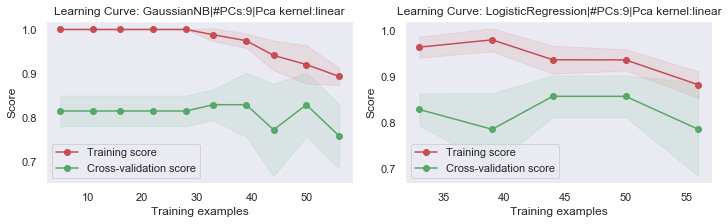

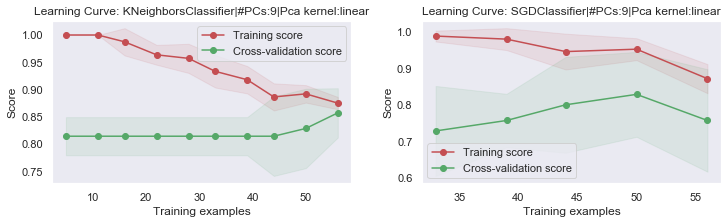

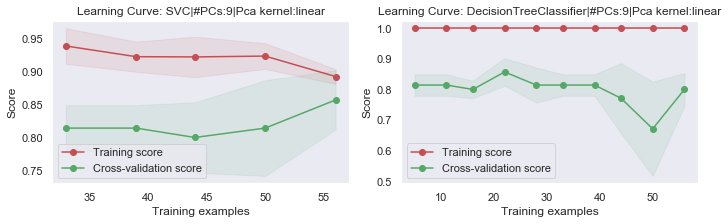

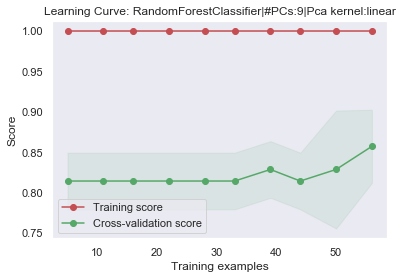

In [42]:
X = rescaledX
n_components=9
learning_curves_by_kernels(
# learning_curves_by_components(
    estimators_list[:], estimators_names[:],
    X, y,
    # train_sizes=list(range(5, 50)),
    train_sizes=np.linspace(.1, 1.0, 10),
    n_components=n_components,
    pca_kernels_list=pca_kernels_list[0],
    verbose=0,
    by_pairs=True,
    savefigs=True,
    figs_dest=os.path.join('figures', 'learning_curve', f"Pcs_{n_components}")
    # figsize=(20,5)
)

What we can learn observig or looking at the bounch of graphics we have displayed just above is that not all of the different machine learning techiniques applied on dataset pre-processed by means of a precise kernel trick adopted for KernelPca show the same behavior, and even some plots suggest us that a machine learning algorithm may seem not suitable for such a small dataset for determining the well-known trend of a learning curve while exploiting a learning technique. To be more precise, we are going to speak roughly and briefly a little bit about each graphics, in the order as they have been shown here before, recalling that we have adopted up to 9 Principal components that account for nearly 95% of comulative explained variance related to the dataset at hand:
- The first general observation or thought that we can explain is that for all the pictures the initial gap between the two curves is most of the time wide, large, in other words, important, more or less about 20% in percentage.
- Speaking about both learning curve obtained from applying Gaussian Niave Bayes, before, and K-Nearest Neighbor, after, what we can say is that the curve related to Training Score is decreasing more or less of 10 point percentage, reaching 90% from the top, while the Cross-alidation curve seems to be constant for the first 6 trials and then to improve a little bit, but for the former model we can see increasing and descreasing that do not allow to fix a trend for measuring a gap between the two curves, instead for the latter model seems that the two curve converge at a certain point once the traingin set is more or less the overall dataset, which means we are going to exploit the most of information.
- Instead, if we focus on Logistic Regression technique and SGD Classifier, we have observed that before a given numebr of trials in both picitures the two curves, that are Trainign and Cross-validation score curves, seem to follow an independent trend increasing and descrising independently, but then the two curves start to follow a decreasing trend so we can hipotize that after that precise trials we may have reached the desired training size.
- The learning curve associated with SVC classifier suggests us that it seems to behave looking at both Traingin and Cross-Validation curve more or less as the previous graphics, but while the Training curve as decreases loosing accuracy score value such a curve tightenes the varaince, instead the Cross-validation curve keeps a wide varaince stretching it while increasing the training set size, meaaning that the models seem to be more unsure about the results.
- The last two graphics are the most problematics and questionable ones, since while enalarging the training size we do not see either improvements or worsening referring to the Training curve, while the Cross-lvalidation curve seems at the very beginning to show a samew behavior as the Training curve, but then after a sequence of trials with increasing training size we get an improvement in terms of accuracy scores. But, since we normally expect to observe a learning curve where Training curve as well as Cross-validation curve respectively decreases and increases their performance at least at a given point where we hope the gap existing between them will be as small as possible wecan think that such those two graphics are nto explaining directly the real issues we face while dealing with Decsion Tree and Radom Forest Classifiers with such a small dataset.

### Cross Validation

Performing cross validation for all the Machine Learning Models to be fine tuned, later once the cross validation results are available to be plotted and to be considered as a base line, since those results are computed when the models have been prepared and configured with default hyper-parameter values.

In [43]:
# Performe all Cross-Validations
# -----------------------------------------------------------------
# naive_bayes_classifier_grid_search(rescaledX, y)
plot_dest = os.path.join("figures", "n_comp_2_analysis", "cross_validation")
# plots_names = list(map(lambda xi: os.path.join(plot_dest, f"{xi}_learning_curve.png"), estimators_names))
plots_names = list(map(lambda xi: f"{xi}_learning_curve.png", estimators_names))

n = len(estimators_list) # len(estimators_list)
dfs_list, df_strfd = fit_all_by_n_components(
    estimators_list=estimators_list[:n], \
    estimators_names=estimators_names[:n], \
    X=X, \
    y=y, \
    n_components=9, \
    show_plots=False, \
    cv_list=cv_list[:N_CV], \
    # pca_kernels_list=['linear'],
    pca_kernels_list=pca_kernels_list[:N_KERNEL-2],
    verbose=0, # 0=silent, 1=show informations,
    plot_dest=plot_dest
)
# show_df_with_mean_at_bottom(df_strfd) # df_strfd.head(df_strfd.shape[0])
show_df_with_mean_at_bottom(df_strfd)

### Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. Here I will provide an intuitive and brief explanation of how naive Bayes classifiers work, followed by its exploitation onto my datasets.

I start saying that Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

n Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features). Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$P(L|features)=\frac{P(features|L)}{P(L)P(features)}$

If we are trying to decide between two labels, and we call them L1 and L2, then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$\frac{P(L1 | features)}{P(L2 | features)}=\frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}$

All we need now is some model by which we can compute P(features | $L_{i}$)

for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

#### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. In fact, one extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

The parameters $\sigma_{y}$ and $\mu_{y}$ are estimated usually using maximum likelihood.

In [44]:
# GaussianNB
# -----------------------------------
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

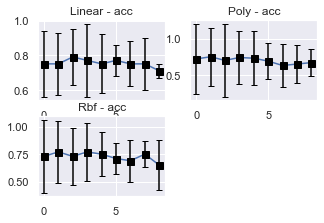

In [45]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

#### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters


These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### Logistic Regression

Logistic regression, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional $l_{1}$, $l_{2}$ or Elastic-Net regularization.

As an optimization problem, binary class $l_{2}$ penalized logistic regression minimizes the following cost function:

- $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

Similarly, $l_{1}$ regularized logistic regression solves the following optimization problem:

- $\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

Elastic-Net regularization is a combination of $l_{1}$ and $l_{2}$, so minimizes the following cost function:

- $\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$
- where  $\rho$ controls the strength of $l_{1}$ regularization vs. $l_{2}$ regularization

### Cross-Validation Results

In [46]:
# LogisticRegression
# -----------------------------------
pos_cv = pos_cv + 1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

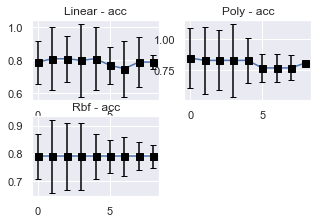

In [47]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grdi-Search Results

Kernel PCA: Linear | LogisticRegression


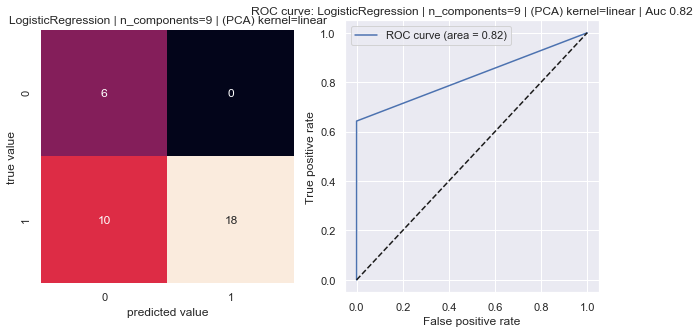

Kernel PCA: Poly | LogisticRegression


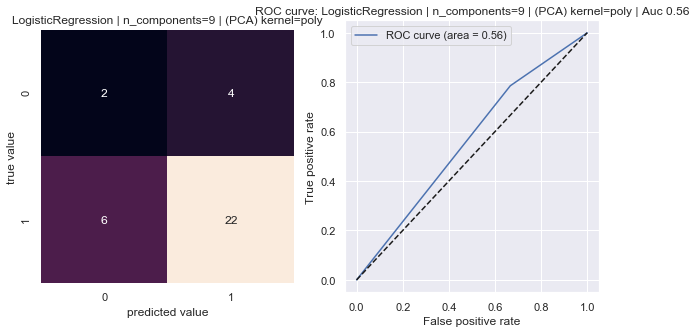

Kernel PCA: Rbf | LogisticRegression


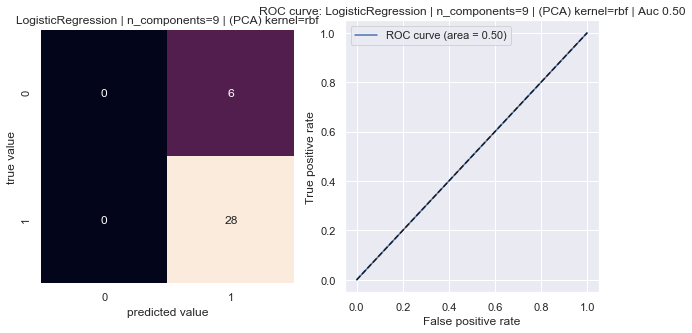

Kernel PCA: Cosine | LogisticRegression


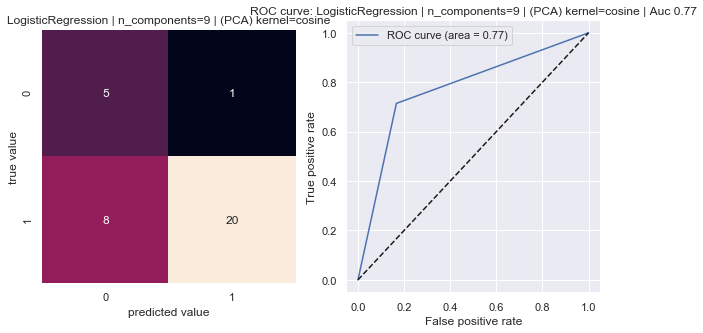

Kernel PCA: Sigmoid | LogisticRegression


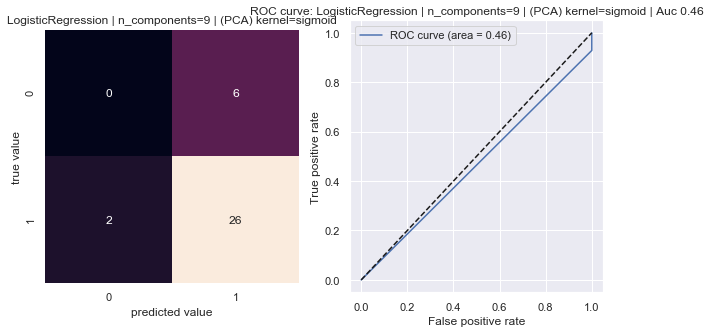

In [48]:
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
df_9, df_9_auc = df_gs, df_auc_gs

Looking at results obtained performing grdi search against logistc regression technique exploiting the different kernel trick available for kernelPca unsupervised method we can notice that only two methods, that are kernel tricks cosine and linear, out of five methods lead to a Roc Curves that was able to account nearly 80 percentage of Area under the curve when the numebr of prinxipal components was set to be equal to 9. More precisely we can end up saying what follows, by analysing the results from above:
- speaking about ___Linear kernel-Pca based Logistic Regression Classifier__ we can say that we obtain the highest value possible for recall related to class 0 and precisionof class 1, this means that we have correctly classified all the istances of fist class and when we are classifying a sample as class 1 we are really sure about it. Instead  we are not very sure when classifying a sample as class 0 since we have a very small precision related to class 0, while recall about class 0 is at least greater than 50 percent so we have a model that is able to classify at least 64 percent of records of class 1. Whereas looking at Roc Curve, this instance of classifier with respec the others of the same nature it is providing the largest interval of thresholds that increases the Sensitivity before the latter will begin to increase nearly in a linear way with the other property n x-axis that is 1-Specificity. We reach up to .82 of area under the curve that is a very high score.
- looking at __Poly kernel-Pca based Logistic Regression Classifier__ we cas immediately observe that the scores and the performance are inferior than the preivous classifier. In paritcular here, in this settings the obtained model is able to correctly classify the most of class 1 examples, but also misclassifyes in practice all the instances from class 0. In fact with such a classifier we can go only a little better than the random classifier, reaching an Area Under the Curve about .56. This configuration between logistic regression classifier plus poly-based kernel for Pca analysis is not adeguate to correctly classify the most samples from both classes, instead it preferes or deprives the class 1 instances.
- Referring to the __Rbf-trick Kernel-Pca based Logistic Regression Classifier__ we can quickly understand that this trial was a complete disaster, since we obtain a Roc Curve that follows almost precisely the Random Classifier behavior, with a AUC equals to 0.5, moreover also here we classify correctly all class 1 instances and misclassify all class 0 instances. The model was not able with the best fit setting found and fine tuned to detect patterns translated into weights that enable to classify correctly the majority of instances from both classes, all togehter.
- The __Cosine-trick kernel-Pca based Model__ with the first model described here for logistic regression are the two models showing the best results. Therefore, also with such a classifier we obtain a sligthly worst performance for recall and precision about class 0 and class 1, but a slightly better scores for precsion anc recall about class 0 and class 1, respectively. This means that we have msiclassified a little bit less samples from class 1, but we misclassify one instance more than the first model from class 0. Speaking about Roc Curve we reach a AUC nearly about .77, just 5 percenage point less than the best model found for logistic regression classifier.
- The __Sigmoid kernel-Pca based Logistic Regression Classifier__, amongst the previosu ones, is the worst classifier due to the fact that it performs even worst than the random classifier, in fact reaches an AUC less than .5. Absolutely, this trial leads to a configuration that never will be adopted for classifying instances from the datsaset we have at hand.

In [49]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Considering just the two classifiers with the best values of Auc that are the two exploing the Linear and Cosine trick adopted for performing kernel-Pca thecnique we can observe that both reaches a high value of accuracy, 92%, and share the same value of hyper-param C, both have exploited during the training the capability of calculating the intercept, so that they are going to model potentially a different behavior for samples with all zeros values for their attributes, if any, but the two exploits diffrent solvers, the former a SAGA salver while the latter a LIBLINEAR solver.
Finally I can conclude saying that if I have to pick a single classifier I will go to select the LogistiRegression model fine tuned based on linear kernel trick for kernel-Pca method, but they are suitable to be exploited to create a custom ensemble method since they differen in a manner such that can provide a contribute to further better classify samples by means a little different set ot point of views that are a distinct penalty l1-norm and l2-norm respectively and different solvers as depicted before.

Kernel PCA: Linear | LogisticRegression


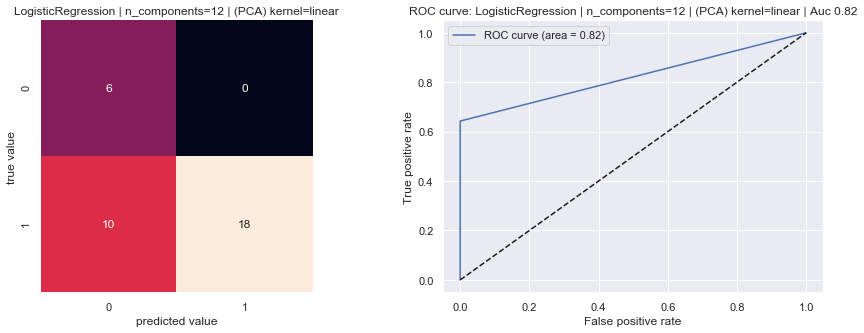

Kernel PCA: Poly | LogisticRegression


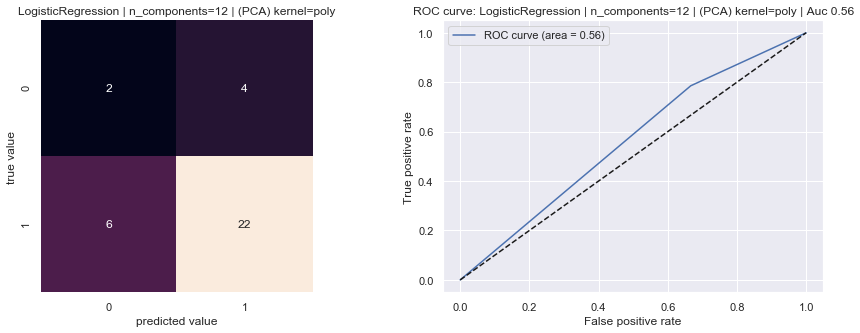

Kernel PCA: Rbf | LogisticRegression


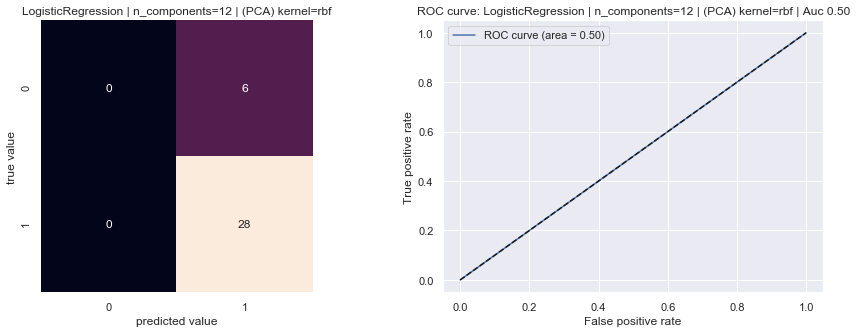

Kernel PCA: Cosine | LogisticRegression


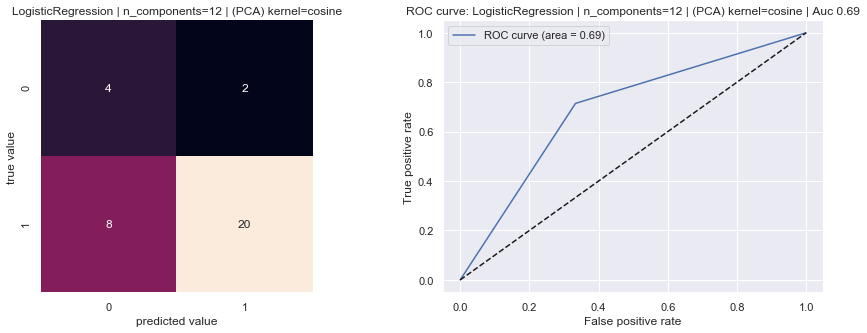

Kernel PCA: Sigmoid | LogisticRegression


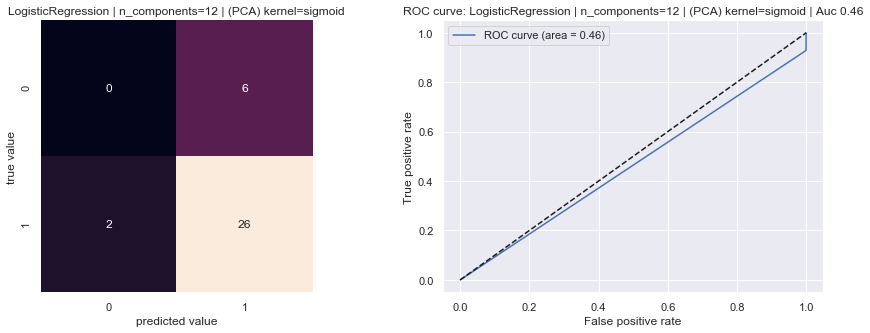

In [46]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
df_12, df_12_auc = df_gs, df_auc_gs

In [47]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Moving toward a increased number of Pcs the major results that we obtain do not different too much from the grid search results we have obtained before we a reduced number of principal components that were up to 9, instead of 11 as above. However we can observe that, even if the linear based kernel pca lead still a good model, we have seen that the cosine kernel trick have caused a waste of performance in terms of Auc vale, of at least 8 percentage points. For the remaining we can follow the same reasoning as for the training done with 9 Pcs.

In [48]:
# merge_images_within_dir(pca_kernels_list, os.path.join(plot_dest, estimators_names[pos_gs+1]))

### Knn

In *Pattern Recognition*, the *K-Nearest Neighbors Algorithm (k-NN)* is a __non-parametric method__ used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

- In *k-NN classification*, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In *k-NN regression*, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

What follows is a briefly explanation of Knn:

The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples. In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point. A commonly used distance metric for continuous variables is *Euclidean distance*.

<img src="images/machine_learning_workflow/KnnClassification.svg.png" alt="KnnClassification" style="width: 200px;"/>

Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

__Choice of Nearest Neighbors Algorithm__: The optimal algorithm for a given dataset is a complicated choice, and depends on a number of factors, number of samples *N* (i.e. n_samples) and dimensionality *D* (i.e. n_features):
- *Brute force* query time grows as $O[D N]$
- *Ball tree* query time grows as approximately $O[D \log(N)]$
- *KD tree* query time changes with *D* in a way that is difficult to precisely characterise. For small *D* (less than 20 or so) the cost is approximately $O[D \log(N)]$, and the KD tree query can be very efficient. For larger *D*, the cost increases to nearly O[DN], and the overhead due to the tree structure can lead to queries which are slower than brute force.

Therefore, we end up saying that, for small data sets (*N* less than 30 or so), $\log(N)$ is comparable to *N*, and brute force algorithms can be more efficient than a tree-based approach. Both KDTree and BallTree address this through providing a leaf size parameter: this controls the number of samples at which a query switches to brute-force. This allows both algorithms to approach the efficiency of a brute-force computation for small *N*.

### Cross-Validation Results

In [49]:
# Knn
# -----------------------------------
pos_cv = pos_cv + 1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

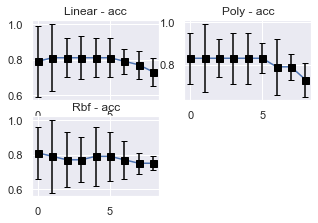

In [50]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grid-Search Results

Kernel PCA: Linear | KNeighborsClassifier


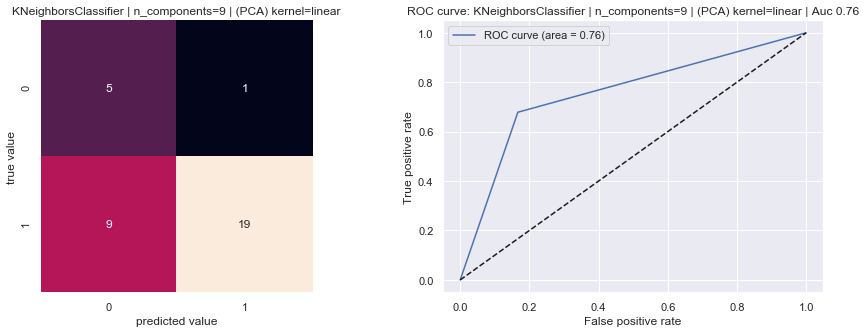

Kernel PCA: Poly | KNeighborsClassifier


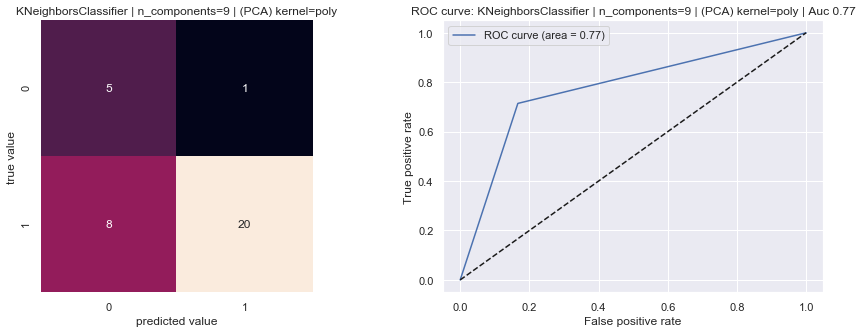

Kernel PCA: Rbf | KNeighborsClassifier


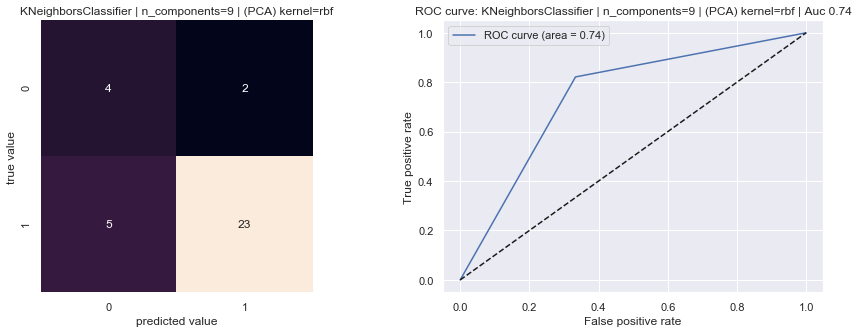

Kernel PCA: Cosine | KNeighborsClassifier


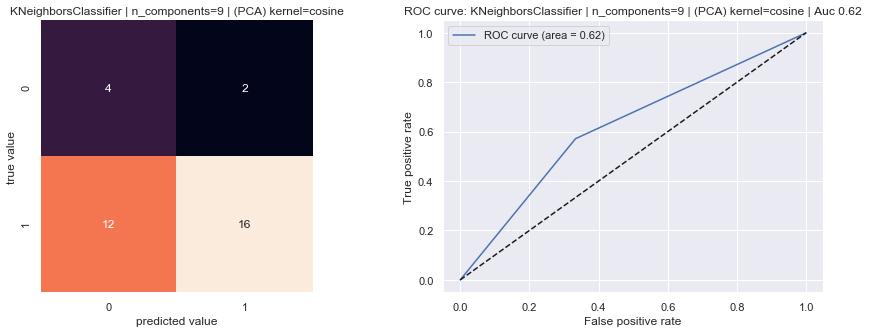

Kernel PCA: Sigmoid | KNeighborsClassifier


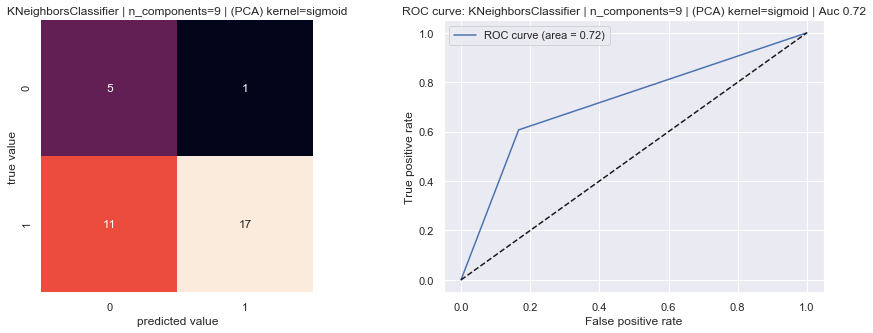

In [51]:
pos_gs = pos_gs + 1
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_9, df_9_auc = pd.concat([df_9, df_gs], axis=0), pd.concat([df_9_auc, df_auc_gs], axis=0)
df_9 = merge_dfs_by_common_columns(df_9, df_gs)
df_9_auc = merge_dfs_by_common_columns(df_9_auc, df_auc_gs)

With respect to the logistic regression model here, exploitng the Knn non-parametric method combined with different kernel tricks available for kerenel-Pca unsupervised algorithm we can observe that generally speaking all those kernel tricks allow after having fine tuned all the learning methods we have reached a better value of Auc on average so the Knn method seems to be more adequate than the prior classifier on average and setting up to 9 Pcs as the number of dimension for the re-projected and reduced 11 original dimensions. However we keep to misclassify at least 9 samples on average per classifier, but it is the same number as those of samples of class 1 misclassified for the best models from logistic regression technique.

Since all the kernel tricks used for the kernel-Pca algorithm have lead to more or less good performances in terms of accuracy and Auc metrics we can suggest that we are more free than the logistic regression algorithm when selecting the preferred kernel trick mode. However, cosine trick is the last one in order to be preferred if we have to sort somehow the modes and this time the poly and rbf tricks seems to have achieved the best values for Auc, respectively 0.77 and 0.74 in percentage, but the Rbf trick meets the highest value for Accuracy metric, even if we misclassify two instances from class 0 out of six, so we can end up saying that this classifier was really more sure about classifying the class 1. In paricular:
- looking at __Linear-trick kernel-Pca based Knn classifier__, the classification report related to such a classifier shows us that this trial is more or less similar to the results we obtained for the Cosine kernel-Pca Logistic Regression, in fact we can notice nearly the same score values for all the major metrics that classification report tells us, and we obtain a Auc value of .76, meanning a one point percent less than the comparing classifier cited above.
- looking at __Poly-trick kernel-Pca based Knn Classifier__ we obtain a better value for Auc that is .77, and we correctly classify one instance more from class 1 than the previous classifier.
- speaking about __Rbf-trick kernel-Pca based Knn Classifier__, the model obtained after carrying out this trial was able to correctly classify up to 23 instance from clas 1, but misclassifyes more isntances from class 0, in fact even if it has a very high Recall related to class 1, we have reached a lower Auc of .74 with respect to the previous classifiers.
- referring to __Cosine-trick kernel-Pca based Knn Classifier__, it is the worst classifier, in fact we misclassify the majority of class 1 instances and reach a Auc of just .62, moreover the Roc curve does not rise up going far from the random classifier curve appreciablely than the other models, this means that this classifier sholud be avoided.
- referring to __Sigmoid-trick kernel-Pca based Knn Classifier__, even if it has obtained a Auc of .72, that is not so far from the other trials that we consider good results about Knn-classifier, it is a model tha was performing just a little bit better than the previous classifier that adopted cosine trick for kernel-Pca.

In [52]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Considering the hyper-parameters values selected when performing satandard grid-search algorithm we can observe that in most of the cases the selected hyper-params lead to accuracy values that are nearly or gretater than 90 percentage of Accuracy. All the methods shared the ball_tress Algorithm, as well as the weights used for measuring the distance between data points was set to be *distance method* and only sigmoid trick for kernel-Pca lead to a *uniform weights function*. Finally the best value for the number of neighbors was set to be equal to three in the most cases and only rbf kernel trick requires to set it even to 7, so two times more than the most frequent value, while sigmoid trick lead to a number of neighbor equal to 4.
We can end saying that in the case of creating a custom ensemble method we should suggest to exploit all those classifiers excet the one based on Cosine trick since it is far from the worst of the remaing knn-based classifer at least of 10 point percentage that do not made it convenient with respect the others.

Kernel PCA: Linear | KNeighborsClassifier


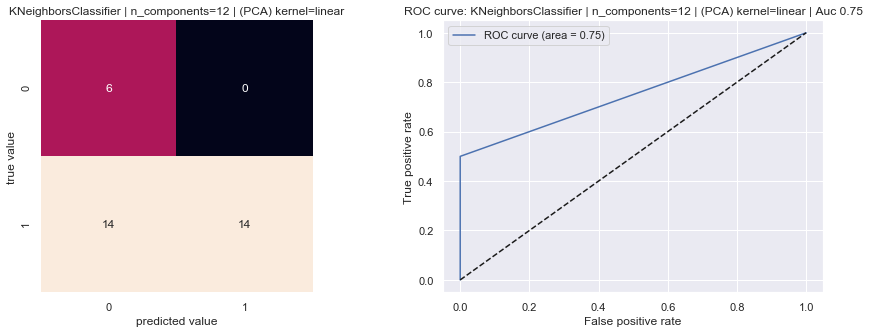

Kernel PCA: Poly | KNeighborsClassifier


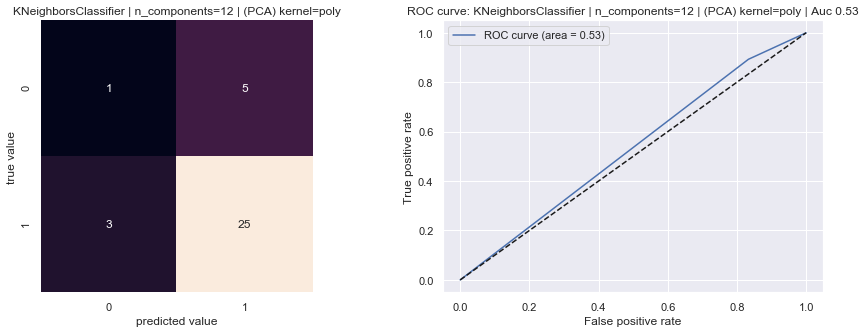

Kernel PCA: Rbf | KNeighborsClassifier


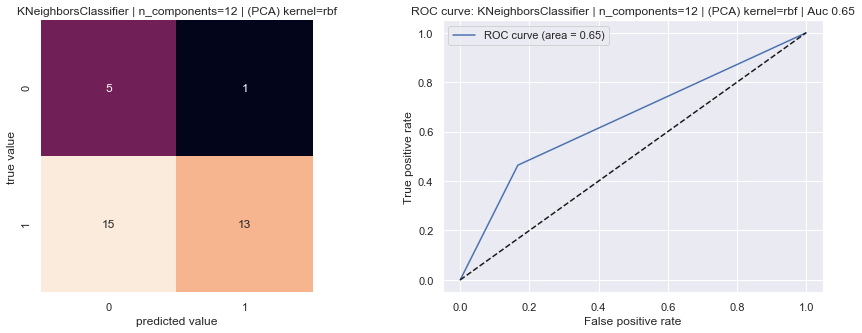

Kernel PCA: Cosine | KNeighborsClassifier


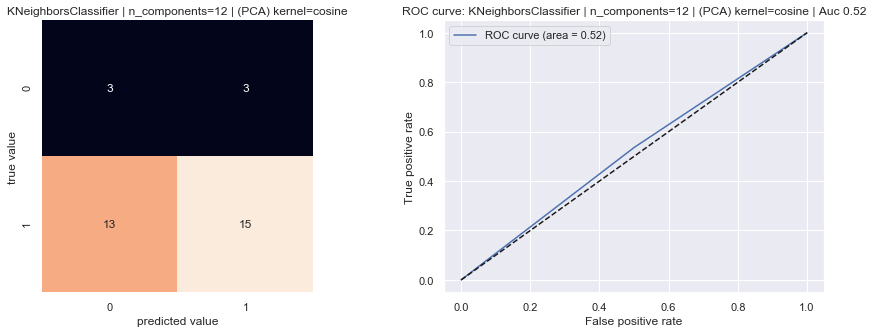

Kernel PCA: Sigmoid | KNeighborsClassifier


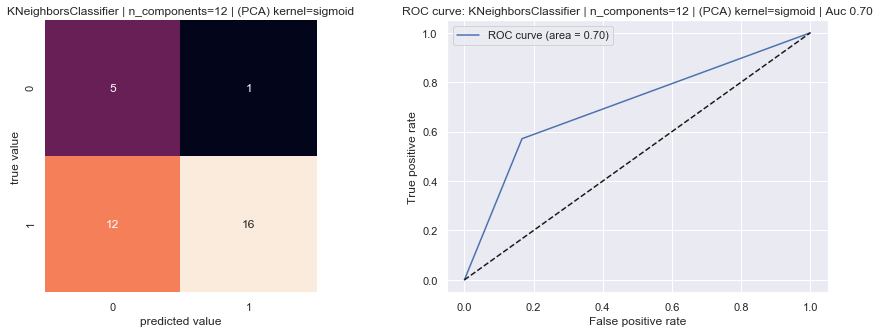

In [53]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
df_12, df_12_auc = pd.concat([df_12, df_gs], axis=0), pd.concat([df_12_auc, df_auc_gs], axis=0)

In [54]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

When we exploit up to 11 Pcs for trainig the models by mens of grid search approach for finding best parameters related to Knn algorithm we can observe as the performance rougly speaking, in general decreases leading the different fine tuned models to be worst than the corresponding models retrieved when setting up to 9 Pcs. So, we can clearly say that intrdoducing much more information we do not allow the models to take adavantage safely for keeping or even increas performance of metrics.

### Stocastic Gradient Descent

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in *text classification * and *natural language processing*. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

__Mathematical formulation__: we describe here the mathematical details of the SGD procedure.

Given a set of training examples $(x_1, y_1), \ldots, (x_n, y_n)$ where $x_i \in \mathbf{R}^m$ and $y_i \in \mathcal{R}$ ($y_i \in {-1, 1}$ for classification), our goal is to learn a linear scoring function $f(x) = w^T x + b$ with model parameters 
$w \in \mathbf{R}^m$ and intercept $b \in \mathbf{R}$. In order to make predictions for binary classification, we simply look at the sign of $f(x)$. To find the model parameters, we minimize the regularized training error given by:
- $E(w,b) = \frac{1}{n}\sum_{i=1}^{n} L(y_i, f(x_i)) + \alpha R(w)$
- where **L** is a loss function that measures model (mis)fit and **R** is a regularization term (aka penalty) that penalizes model complexity; $\alpha > 0$ is a non-negative hyperparameter that controls the regularization stength.

Different choices for **L** entail different classifiers or regressors:

- Hinge (soft-margin): equivalent to Support Vector Classification: $L(y_i, f(x_i)) = \max(0, 1 - y_i f(x_i))$.
- Perceptron: $L(y_i, f(x_i)) = \max(0, - y_i f(x_i))$
- Modified Huber: $L(y_i, f(x_i)) = \max(0, 1 - y_i f(x_i))^2$ if $y_i f(x_i) >1$, otherwise in $L(y_i, f(x_i)) = -4 y_i f(x_i)$
- Log: equivalent to Logistic Regression: $L(y_i, f(x_i)) = \log(1 + \exp (-y_i f(x_i)))$
- Least-Squares: Linear regression (Ridge or Lasso depending on **R**): $L(y_i, f(x_i)) = \frac{1}{2}(y_i - f(x_i))^2$.
- Huber: less sensitive to outliers than least-squares. It is equivalent to least squares when $|y_i - f(x_i)| \leq \varepsilon$, and $L(y_i, f(x_i)) = \varepsilon |y_i - f(x_i)| - \frac{1}{2} \varepsilon^2$ otherwise.
- Epsilon-Insensitive: (soft-margin) equivalent to Support Vector Regression: $L(y_i, f(x_i)) = \max(0, |y_i - f(x_i)| - \varepsilon)$

Finally, popular choices for the regularization term  (the penalty parameter) include:
- L2 norm: $R(w) := \frac{1}{2} \sum_{j=1}^{m} w_j^2 = ||w||_2^2$
- L1 norm: $R(w) := \sum_{j=1}^{m} |w_j|$ ,which leads to sparse solutions.
- Elastic Net: $R(w) := \frac{\rho}{2} \sum_{j=1}^{n} w_j^2 +(1-\rho) \sum_{j=1}^{m} |w_j|$, a convex combination of L2 and L1, where $\rho$ is given by $1 - l1_{ratio}$.

__Adavantages and Backwards__: the advantages of Stochastic Gradient Descent are:
- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).
- Complexity: The major advantage of SGD is its efficiency, which is basically linear in the number of training examples. If X is a matrix of size (n, p) training has a cost of $O(k n \bar p)$, where k is the number of iterations (epochs) and $\bar p$ is the average number of non-zero attributes per sample.

The disadvantages of Stochastic Gradient Descent include:
- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

### Cross-Validation Result

In [55]:
# DecisionTreeClassifier
# -----------------------------------
pos_cv = pos_cv + 1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

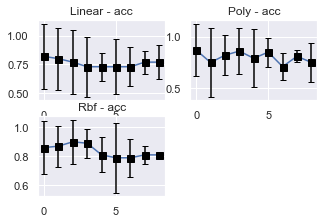

In [56]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grid-Search Result

Kernel PCA: Linear | SGDClassifier


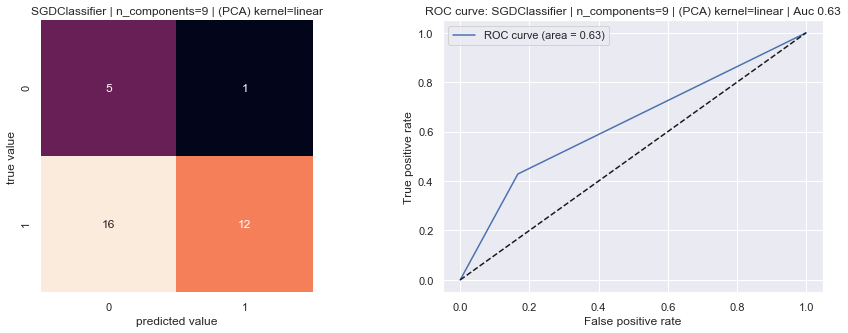

Kernel PCA: Poly | SGDClassifier


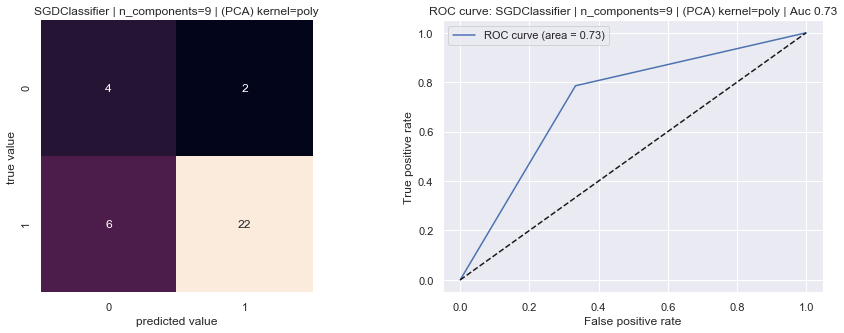

Kernel PCA: Rbf | SGDClassifier


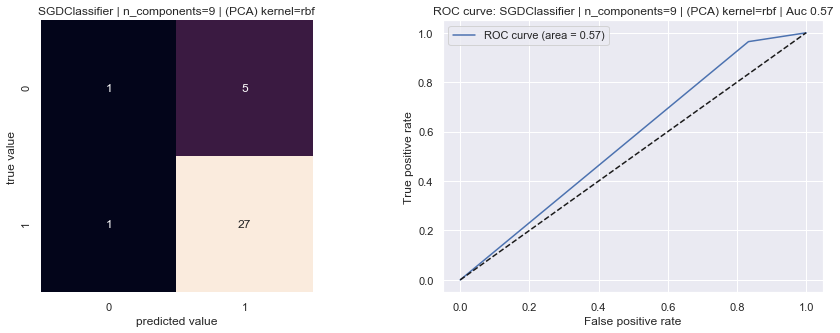

Kernel PCA: Cosine | SGDClassifier


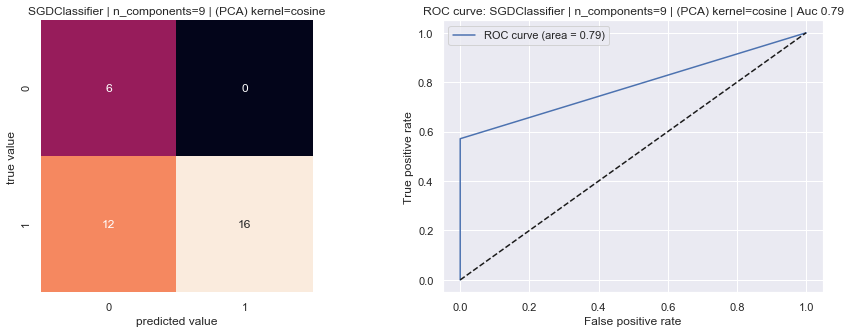

Kernel PCA: Sigmoid | SGDClassifier


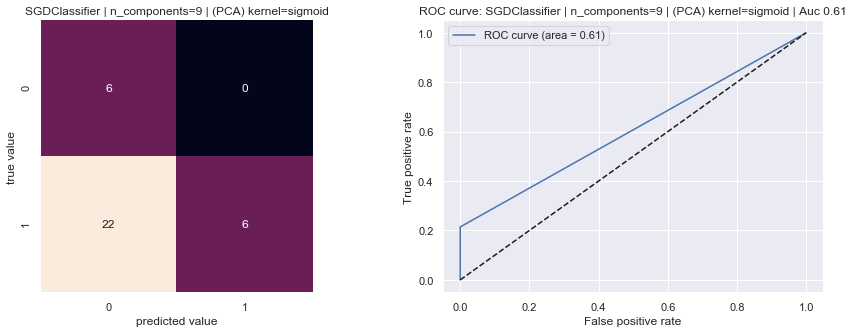

In [57]:
pos_gs = pos_gs + 1
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_9, df_9_auc = pd.concat([df_9, df_gs], axis=0), pd.concat([df_9_auc, df_auc_gs], axis=0)
df_9 = merge_dfs_by_common_columns(df_9, df_gs)
df_9_auc = merge_dfs_by_common_columns(df_9_auc, df_auc_gs)

Looking at the results we can collect from the trials we have carryed out for grid-search algorithm exploiting different kernel-tricks for kernel-Pca unsupervised machine learning method we can end up saying that Sgd Classifier roughly speaking do not performe in satisfying manner in no settings because the different models do not find the right trade-off or they do not balance sufficiently the weight values of their parameters to be able to classify the most samples from both classes, instead the results lead to classifiers that prefere or advantage the classification of one class with respect the other. To be more precise we can say what follows:
- looking at __Linear-trick kernel-Pca based Sgd Classifier__, it obtain after fine tuning the hyper-params by means of grid search technique a Auc of just .66, however the Roc Curve do not rise up in an appreciable  way with respect to the other preivous classifiers, and the model even if was able to correctly classify all the samples from class 0, it wrongly classify the majority of class 1 instances, so it results to be precise with respect to class 1, but we cannot say the same thing abbout precision when speaking of class 0.
- looking at __Poly-trick kernel-Pca based Sgd Classifier__, we get really better results when looking at Roc curve and Auc value, since we obtain a value of .79 for Auc and we can observe that for a somewhat large range of values for threshold the model increases the Sensitivity, before linearly increasing both Sensitivy and 1-Specificity metrics. The model as the one before it is really precise for class 1 and have an high recall for class 0, however is not really precise when looking at the instances it classifyes as class 0.
- speaking about __Rbf-trick kernel-Pca based Sgd Classifier__, it results to be the worst classifier, since its Roc Curve and Auc value are really poor in term of performance, due to the fact that the former does not behave reallly better than the Random Classifier and so the latter also can reach a score that is slightly better than the reffering classifier knwon as Random Classifier, in fact the obtained value was about .57 for Auc. However, the model got a high value of recall for class 1 but was not really precise when still speaking about class 1 since we can state that in practice the model wrongly classifyes all the instances from class 0, and just one from class 1.
- referring to __Cosine-trick kernel-Pca based Sgd Classifier__, we can understand that also this classifier does not allow us to have found a well performing classifier. The reason is that the Auc score reaches only 0.64 and the Roc Curve only for a very tiniy interval of thresholds allows the Sensitivity to grows without let growing as well the 1-Specificity, before both start growing almost linearly. Furthermore, the model even if correctly classifyes all the instances from class 0, on the other hand wasn able to identifyes patterns translated into weights and slected hyper-params that allow to correctly recognize the differences of class 0 with class 1 in fact most of the class 1 instances was wrongly predicted.
- Lastly, speaking about __Sigmoid-trick kernel-Pca Sgd Classifier__, we can claim that it results to be the best model found amongst the all the trials we perform for grid-search analyses about a possible Sgd Classifier. In fact we end up with a Roc Curve that allows to reach up to .8 of Auc score. Moreover, the range of possible thresholds before both TPR and FPR start growing nearly in a linear manner is somewhat huge if compared with earlier models. However, even if the Roc Curve seems to suggest us that such a model is promising, we can observe that it results into a classifier with high recall for class 0, but a lower precision for class 0 than the precision we obtain for class 1, also, we have to say that the model still wrongly predict a numnber of instances from class 1 that suggest us that may be better models that the one found.

In [58]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

The choice of the kernel-trick for kernel-Pca unsupervised machine learnign technique results to be important as well as decisive when looking at the different hyper-parameters adopted by the fine tuned models in particular for *alpha, max_iter and penalty hyper-parameters*, since the *tol* was the same value in all the trials we carryed out. In partcular we can observe that only in one case out of five the alpha parameter was set as 0.1, instead in the majority of cases the preferred value was set to be 0.0001, up to three degree of magnitude lower. Instead looking to *max_iter* hyper-param wer can understand that the numebr of iteration before facing convergence vary significantly from model to model in a huge range that crosses three order of magnitude, in other words from 10^1 up to 10^3. Lastly, focusing on *penalty* hyper-params we can observe that only the first model that is the one trained fixing linear-trick for kernel-Pca adopted *elasticnet technique*, even if the best result was gained by means of *l2-norm penalty*, which was the most frequent choice.
If we think about a possible custom ensemble method constructed adopting some of the previous models, we can end up saying that only two out of five can be adopted, which are those models trained fixing or selecting Poly and Simoid tricksd for kernel-Pca. Moreover, the two selected method differ jsut for the numebr of iteration required for convergence purpose, where the former employes less iterations than the latter.

Kernel PCA: Linear | SGDClassifier


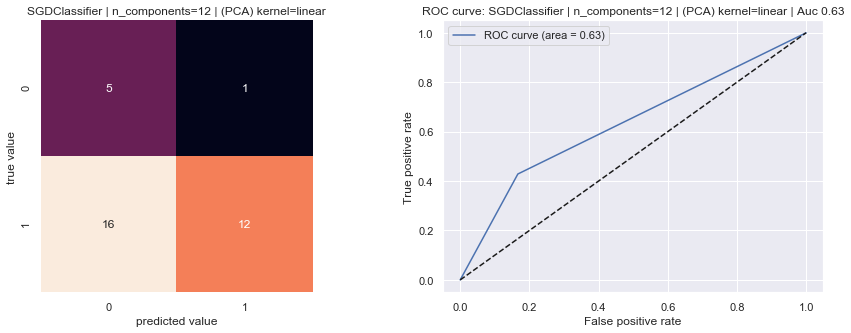

Kernel PCA: Poly | SGDClassifier


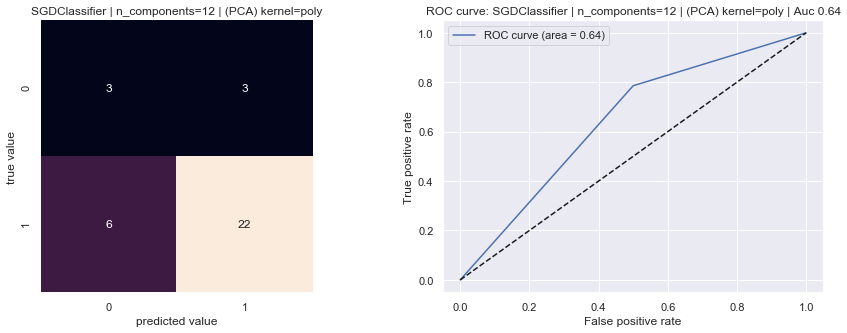

Kernel PCA: Rbf | SGDClassifier


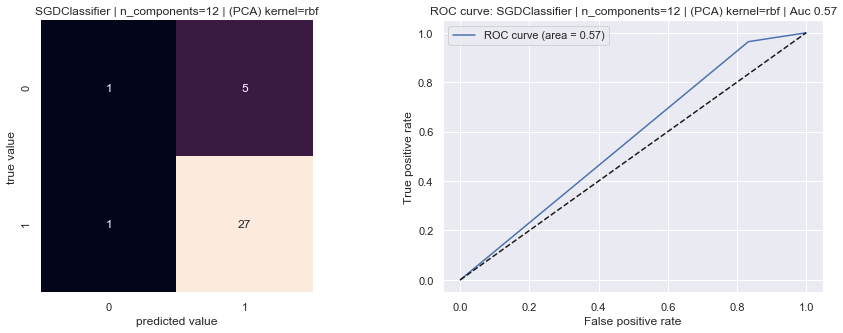

Kernel PCA: Cosine | SGDClassifier


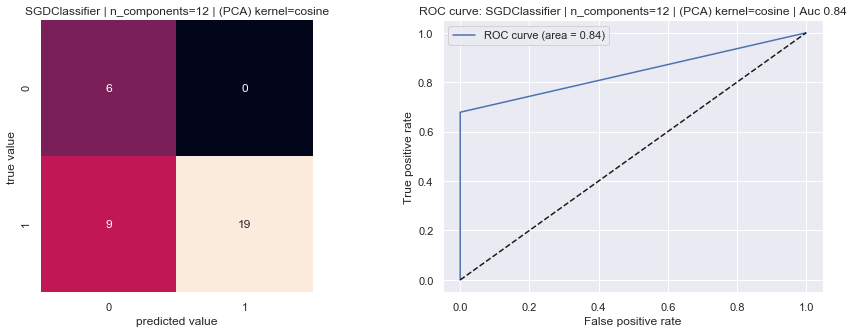

Kernel PCA: Sigmoid | SGDClassifier


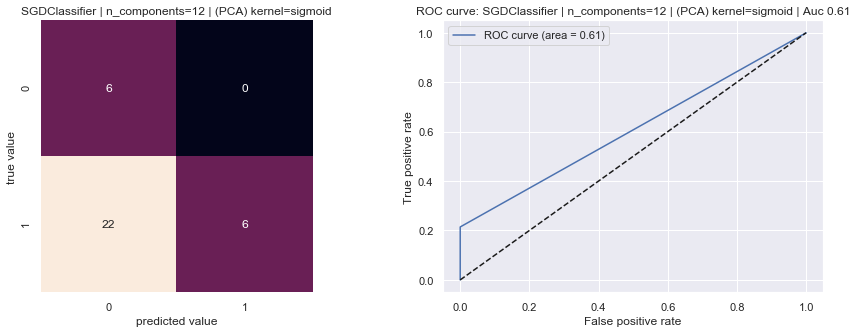

In [59]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_12, df_12_auc = pd.concat([df_12, df_gs], axis=0), pd.concat([df_12_auc, df_auc_gs], axis=0)
df_12 = merge_dfs_by_common_columns(df_12, df_gs)
df_12_auc = merge_dfs_by_common_columns(df_12_auc, df_auc_gs)

In [60]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Looking at the result obtained from grid search algorithm when number of Pcs was set to be 11 we can suggest that generally even if the accuracy scores are still high, since reaches on average 92 percentage, these values are not high as the values obtained for classifer with up to 9 Pcs because we can also observe that Auc in most cases reduces of 10 or 20 percentage points.

### Support Vector Machines Classifier

<img src="images/SVM_margin.png" alt="SVM Margin " style="width: 200px;"/>

Here, in this section I'm going to exploit a machine learning techinique known as Support Vectors Machines in order to detect and so select the best model I can produce throughout the usage of data points contained within the dataset at hand. So let discuss a bit those kind of classifiers.

In machine learning, **support-vector machines**, shortly SVMs, are *supervised learning models* with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a *non-probabilistic binary linear classifier*. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high-dimensional space, which can be used for classification, regression. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class, so-called *functional margin*, since in general the larger the margin, the lower the *generalization error* of the classifier.

#### Mathematical formulation of SVMs
Here, I'm going to describe the main mathematical properties and characteristics used to derive from a math point of view the algorithm derived and proven by researches when they have studied SVMs classifiers.

I start saying and recalling that A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class so-called functional margin, since in general the larger the margin the lower the generalization error of the classifier.

When demonstrating SVMs classifier algorithm I suppose that We are given a training dataset of *n*n points of the form:

\begin{align}
(\vec{x_1} y_1),..,(\vec{x_n},y_n)
\end{align}

where the $y_{1}$ are either 1 or −1, each indicating the class to which the point $\vec{x}_{i}$ belongs. Each $\vec{x}_{i}$is a *p-dimensional real vector*. We want to find the "maximum-margin hyperplane" that divides the group of points $\vec{x}_{i}$ for which $y_{1}$ = 1from the group of points for which $y_{1}$ = − 1, which is defined so that the distance between the hyperplane and the nearest point $\vec{x}_{i}$  from either group is maximized.

Any hyperplane can be written as the set of points $\vec{x}_{i}$  satisfying : $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = 0$; where  $\vec{w}_{i}$ is the, even if not necessarily, normal vector to the hyperplane. The parameter $\tfrac {b}{\|\vec{w}\|}$ determines the offset of the hyperplane from the origin along the normal vector $\vec{x}_{i}$.

Arrived so far, I have to distiguish between two distinct cases which both depende on the nature of data points that generally made up a given dataset. Those two different cases are called *Hard-Margin* and *Soft Margin* and, respectively.

The first case, so the ***Hard-Margin*** case, happens just for really optimistics datasets. In fact it is the case when the training data is linearly separable, hence, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations:
- $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = 1$, that is anything on or above this boundary is of one class, with label 1;
- and, $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = -1$, that is anything on or above this boundary is of one class, with label -1.

We can notice also that the distance between these two hyperplanes is ${\displaystyle {\tfrac {2}{\|{\vec {w}}\|}}}$ so to maximize the distance between the planes we want to minimize ‖ w → ‖ {\displaystyle \|{\vec {w}}\|} \|{\vec {w}}\|. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each *i*:
- either, ${\displaystyle {\vec {w}}\cdot {\vec {x}}_{i}-b\geq 1}$, ${\displaystyle y_{i}=1}$;
- or, ${\displaystyle {\vec {w}}\cdot {\vec {x}}_{i}-b\leq -1}$, if ${\displaystyle y_{i}=-1}$.

These constraints state that each data point must lie on the correct side of the margin.
Finally, we collect all the previous observations and define the following optimization problem:
- from $y_{i}(\vec{w}_{i}\cdot{\vec{x}_{i}} - b) \geq 1$, for all $1 \leq i \leq n$;
- to minimize ${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1}$ ${\displaystyle i=1,\ldots ,n}$.

The classifier we obtain is made from ${\vec {w}}$ and ${\displaystyle b}$ that solve this problem, and he max-margin hyperplane is completely determined by those ${\vec {x}}_{i}$ that lie nearest to it. These $\vec{x}_{i}$ are called *support vectors*.

The other case, so the ***Soft-Margin*** case, convercely happens when the training data is not linearly separable. To deal with such situation, as well as, to extend SVM to cases in which the data are not linearly separable, we introduce the hinge loss function, that is: $max(y_{i}(\vec{w}_{i}\cdot{\vec{x}_{i}} - b))$.
Once we have provided the new loss function we go ahead with the new optimization problem that we aim at minimizing that is:

\begin{align}
{\displaystyle \left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\right)\right]+\lambda \lVert {\vec {w}}\rVert ^{2},}
\end{align}

where the parameter \lambda determines the trade-off between increasing the margin size and ensuring that the ${\vec {x}}_{i}$ lie on the correct side of the margin. Thus, for sufficiently small values of\lambda , the second term in the loss function will become negligible, hence, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not.

What we notice from last equations written just above is that we deal with a quadratic programming problem, and its solution is provided, detailed below.

We start defining a *Primal Problem* as follow:
- For each $\{1,\,\ldots ,\,n\}$ we introduce a variable ${\displaystyle \zeta _{i}=\max \left(0,1-y_{i}(w\cdot x_{i}-b)\right)}$. Note that ${\displaystyle \zeta _{i}}$ is the smallest nonnegative number satisfying ${\displaystyle y_{i}(w\cdot x_{i}-b)\geq 1-\zeta _{i}}$;
- we can rewrite the optimization problem as follows: ${\displaystyle {\text{minimize }}{\frac {1}{n}}\sum _{i=1}^{n}\zeta _{i}+\lambda \|w\|^{2}}$,  ${\displaystyle {\text{subject to }}y_{i}(w\cdot x_{i}-b)\geq 1-\zeta _{i}\,{\text{ and }}\,\zeta _{i}\geq 0,\,{\text{for all }}i.}$

However, by solving for the *Lagrangian dual* of the above problem, one obtains the simplified problem:
\begin{align}
    {\displaystyle {\text{maximize}}\,\,f(c_{1}\ldots c_{n})=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(x_{i}\cdot x_{j})y_{j}c_{j},} \\
{\displaystyle {\text{subject to }}\sum _{i=1}^{n}c_{i}y_{i}=0,\,{\text{and }}0\leq c_{i}\leq {\frac {1}{2n\lambda }}\;{\text{for all }}i.} 
\end{align}
- moreover, the variables $c_i$ are defined as ${\displaystyle {\vec {w}}=\sum _{i=1}^{n}c_{i}y_{i}{\vec {x}}_{i}}$. Where, ${\displaystyle c_{i}=0}$ exactly when ${\displaystyle {\vec {x}}_{i}}$ lies on the correct side of the margin, and ${\displaystyle 0<c_{i}<(2n\lambda )^{-1}}$ when ${\vec {x}}_{i}$ lies on the margin's boundary. It follows that ${\displaystyle {\vec {w}}}$ can be written as a linear combination of the support vectors.

The offset, ${\displaystyle b}$, can be recovered by finding an ${\vec {x}}_{i}$ on the margin's boundary and solving: ${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)=1\iff b={\vec {w}}\cdot {\vec {x}}_{i}-y_{i}.}$ 

This is called the *dual problem*. Since the dual maximization problem is a quadratic function of the ${\displaystyle c_{i}}$ subject to linear constraints, it is efficiently solvable by quadratic programming algorithms.

Lastly, I will discuss what in the context of SVMs classifier is called as ***Kernel Trick***.
Roughly speaking, we know that a possible way of dealing with datasets that are not linearly separable but that can become linearnly separable within an higher dimensional space, or feature space, we can try to remap the original data points into a higher order feature space by means of some kind of remapping function, hence, solve the SVMs classifier optimization problem to find out a linear classifier in that new larger feature space. Then, we project back to the original feature space the solution we have found, reminding that in the hold feature space the decision boundaries founded will be non-linear, but still allow to classify new examples.

Usually, especially, dealing with large datasets or with datasets with large set of features this approach becomes computationally intensive and and unfeasible if we run out of memory. So, in other words, the procedure is constrained in time and space, and might become time consuming or even unfeasible because of the large amount of memory we have to exploit.

An reasonable alternative is represented by the usage of kernel functions that are function which satisfy ${\displaystyle k({\vec {x}}_{i},{\vec {x}}_{j})=\varphi ({\vec {x}}_{i})\cdot \varphi ({\vec {x}}_{j})}$, where we recall that classification vector ${\vec {w}}$ in the transformed space satisfies ${\displaystyle {\vec {w}}=\sum _{i=1}^{n}c_{i}y_{i}\varphi ({\vec {x}}_{i}),}$
where, the ${\displaystyle c_{i}}$ are obtained by solving the optimization problem:

${\displaystyle {\begin{aligned}{\text{maximize}}\,\,f(c_{1}\ldots c_{n})&=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\varphi ({\vec {x}}_{i})\cdot \varphi ({\vec {x}}_{j}))y_{j}c_{j}\\&=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}k({\vec {x}}_{i},{\vec {x}}_{j})y_{j}c_{j}\\\end{aligned}}}$

${\displaystyle {\text{subject to }}\sum _{i=1}^{n}c_{i}y_{i}=0,\,{\text{and }}0\leq c_{i}\leq {\frac {1}{2n\lambda }}\;{\text{for all }}i.}$

The coefficients ${\displaystyle c_{i}}$ can be solved for using quadratic programming, and we can find some index ${\displaystyle i}$ such that ${\displaystyle 0<c_{i}<(2n\lambda )^{-1}}$, so that ${\displaystyle \varphi ({\vec {x}}_{i})}$ lies on the boundary of the margin in the transformed space, and then solve, by substituting doto product between remapped data points with kernel function applied upon the same arguments:

${\displaystyle {\begin{aligned}b={\vec {w}}\cdot \varphi ({\vec {x}}_{i})-y_{i}&=\left[\sum _{j=1}^{n}c_{j}y_{j}\varphi ({\vec {x}}_{j})\cdot \varphi ({\vec {x}}_{i})\right]-y_{i}\\&=\left[\sum _{j=1}^{n}c_{j}y_{j}k({\vec {x}}_{j},{\vec {x}}_{i})\right]-y_{i}.\end{aligned}}}$

Finally, ${\displaystyle {\vec {z}}\mapsto \operatorname {sgn}({\vec {w}}\cdot \varphi ({\vec {z}})-b)=\operatorname {sgn} \left(\left[\sum _{i=1}^{n}c_{i}y_{i}k({\vec {x}}_{i},{\vec {z}})\right]-b\right).}$

What follows is a briefly list of the most commonly used kernel functions. They should be fine tuned, by means of a either grid search or random search approaches, identifying the best set of values to replace whitin the picked kernel function, where the choice depend on the dataset at hand:
- Polynomial (homogeneous): ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=({\vec {x_{i}}}\cdot {\vec {x_{j}}})^{d}}$.
- Polynomial (inhomogeneous): ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=({\vec {x_{i}}}\cdot {\vec {x_{j}}}+1)^{d}}$.
- Gaussian radial basis function: ${\displaystyle \gamma =1/(2\sigma ^{2})} {\displaystyle \gamma =1/(2\sigma ^{2})}$.
- Hyperbolic tangent: ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=\tanh(\kappa {\vec {x_{i}}}\cdot {\vec {x_{j}}}+c)}$ for some (not every) ${\displaystyle \kappa >0}$ and ${\displaystyle c<0}$.

What follows is the application or use of SVMs classifier for learning a model that best fit the training data in order to be able to classify new instance in a reliable way, selecting the most promising model trained.

### Cross-Validation Result

In [61]:
# RandomForestClassifier
# -----------------------------------
pos_cv = pos_cv + 1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

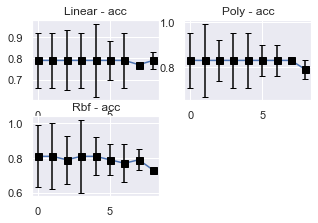

In [62]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grid-Search Result

Kernel PCA: Linear | SVC


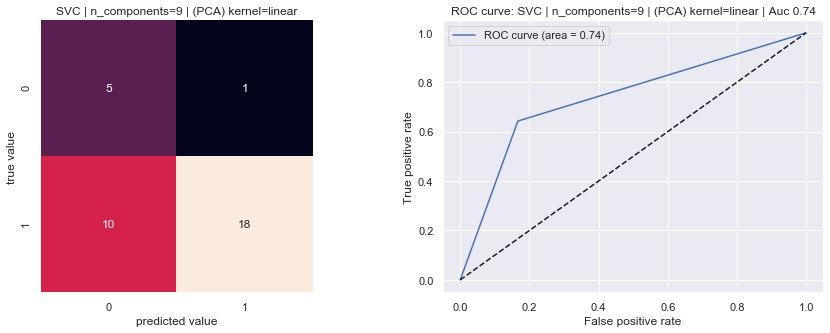

Kernel PCA: Poly | SVC


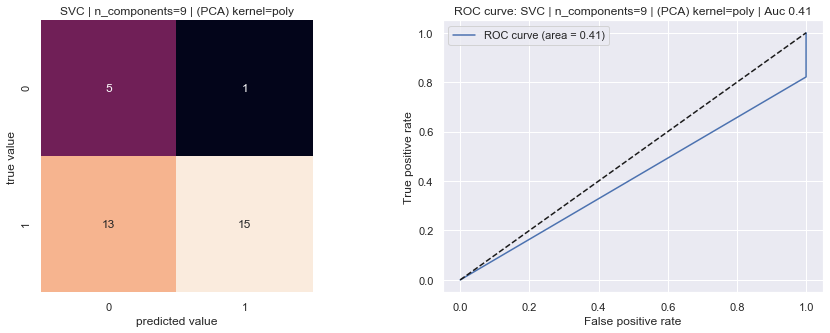

Kernel PCA: Rbf | SVC


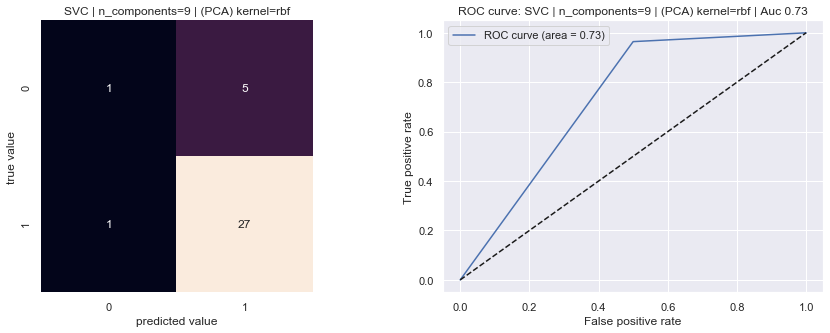

Kernel PCA: Cosine | SVC


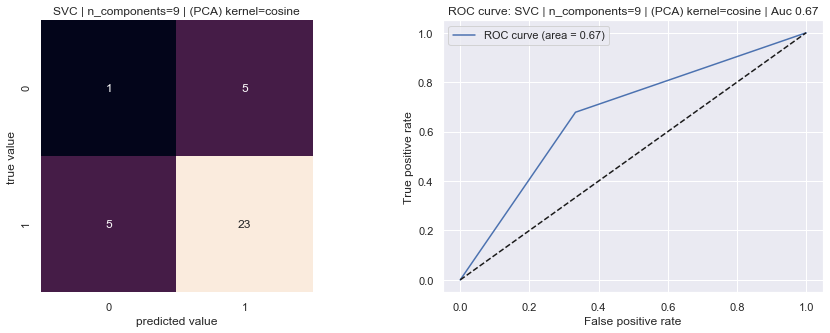

Kernel PCA: Sigmoid | SVC


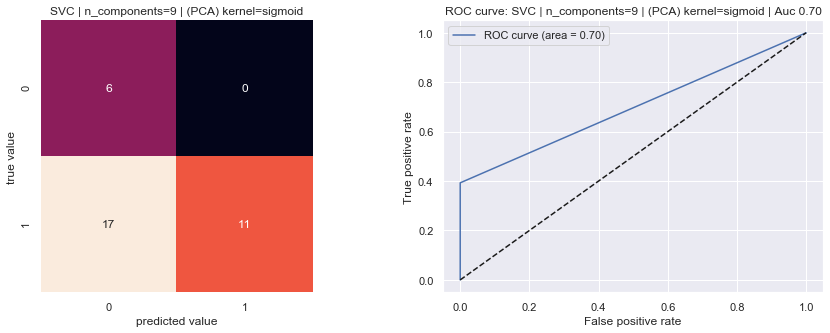

In [63]:
pos_gs = pos_gs + 1
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_9, df_9_auc = pd.concat([df_9, df_gs], axis=0), pd.concat([df_9_auc, df_auc_gs], axis=0)
df_9 = merge_dfs_by_common_columns(df_9, df_gs)
df_9_auc = merge_dfs_by_common_columns(df_9_auc, df_auc_gs)

Generally speaking, looking at results coming from the trials we have carried out with grid search algorithm for the purpose of fine tuning the SVM classifier adopted to fit models against the dataset at hand, we can claim that only three models out of five gives us important, significant performance, while oen model even if corresponds to that with the best Auc score is not satisfying our main goal we have in mind, that is correctly classify the majority instances from both classes, lastly the remaing classifier that corresponds to poly-tirkc kernel Pca based classifier is that with worst performance in terms of measurement metrics. To be more precise we can say what follows:
- looking at __Linear-trick kenrle-Pca based Svm Model__, we can state that it belongs to the set of three classifier we consider satisfying results for such a classifier, since it reaches an Auc score equals to .74, however discussing the Roc Curve we can observe that it starts with a higher slope and then ends with a lower slope for describing the relation between the Sensitivity and 1-Specificity scores. Moreover, the model obtain high values for both precision and recall related to class 1, but the recall of class 0 was higher than the precision of the same class, so we get troubles when classifying as class 0 new instances since we are less sure about the result.
- focusing on __Poly-trick kenrle-Pca based Svm Classifier__, this trials corresponds to the worst classifier gathered from grid-search approach when fine tuning such model because the setting adopted for the model leads to a Auc score lower than the random class, so this model should be discarded, even if seems to get good performance when looking at calculated classification report.
- speaking of __Rbf-trick kenrle-Pca based Svm Classifier__, here we can state that the fianl model leads to a very well performing roc curve, in fact the Auc score is even .73, one of the highes found, and also the interval of thresholds before the TPR and FPR scores begin to linearly increas is very wide. However the classifier with a default threshold of .5, seems not to perform adequately, since it classify correctly most of the samples from class 1 but wrongly predicts class label for samples belonging to class 0, meaning it was a model with high recall but low precision for for class 1 and very poor performance generally speaking for class 0 related metrics.
- also the __Cosine-trick kenrle-Pca based Svm Classifier__ shows the same issues more or less as the previous classifier, in other words, the model was well performing for class 1 with high recall and precision but really bad performing for precision and recall related to class 0. Thus, looking to Roc Curve and Auc Score, we can say that the shape of Roc Curve shows a model which in the first part has a higher slope that describes how the TPR and FPR increases with the different thresholds, while int the second half the steepness of the slope reduces, however the Auc score is not soo good, just .67.
- Finally, discussing the __Sigmoid-trick kenrle-Pca based Svm Classifier__, we can observe that with a default threshold of 0.5 the model was able to correctly classify all the instances belonging to class 0 leading to high recall as well as high precisoin for class 0 and class 1 respectively, however, both precision and recall of class 0 and class 1 was convercely very low, this means tha the model is very sure when classifyng instances as belonging to class 1 but is almost unsure when facing an instance that virtually belongs to class 0. Focusing on Roc Curve the model has a tiny range of thresholds where the model increases the Sensitivity without changing the 1-Specificity, but, at a given point the remaing part of roc curve seems to follow a linear curve for describing the relation beween TPR and FPR fractions, leading the model to record a Auc score of .7.

In [64]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Looking at the table dispalyed just above, referred to the found hyper-params values identifyed by grid search procedure that attempt to fine tuning the Svm Classifier combining it with different possbile kernel tricks for kernel-Pca unsupervised learning technique, we can clearly understand that the accuracy results gained by the best models retrieved by grid-search procedures corresponds to value near 90 percent of accuracy.However, the choice of kenrel trick affected importantly and widely the identification of proper values for hyper-params such as *C, gamma, and kernel-trick related to Svm Classifier*.

More precisely, we can say that for *C hyper-param* we go across a wide range of values from 0.0001 up to 10 and except to Rbf and Cosine  tricks adopted for kernel-Pca, there are no other models that share the same value of hyper-param C. What we can further note is that as the kernel-trick adopted to performe kernel-Pca becomes more fancy and complicated from the viewpoint of math formulation the value assumend by *C hyper-param* seems to become greater and greater, where we recall that the *parameter C* controls the trade off between errors of the SVM on training data and margin maximization. So as we increase the complexity of kernel-trick for kernel-Pca we observe that the resulting marigns becomes more and more hard.

Instead, if we think intuitively of the *gamma parameter* as that parameter which defines how far the influence of a single training example reaches, with low values meaning *'far'* and high values meaning *'close'*, then we can see a trend for which as the margin becomes harder the influence of the single seems to be closer.

Finally, looking at kernel trick chosen from different models  we observe that in the most of the cases the polynomial kernel was the best choice and only sigmoid trick was adopted when also the kernel-Pca technique was performed exploiting the same kind of trick, as well as the linear trick was selected as the best choice combining with a kernel-Pca that instead adopted a Rbf-kernel.

Kernel PCA: Linear | SVC


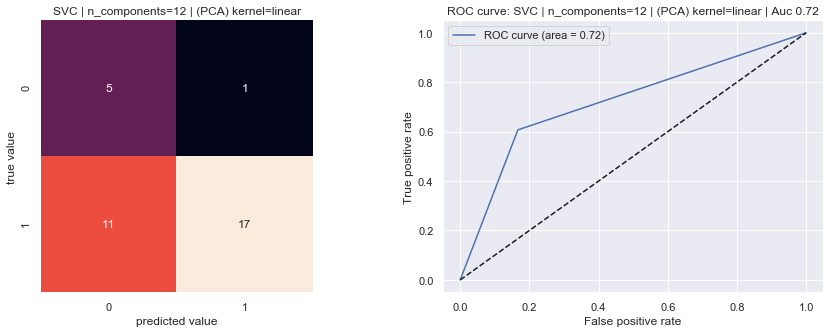

Kernel PCA: Poly | SVC


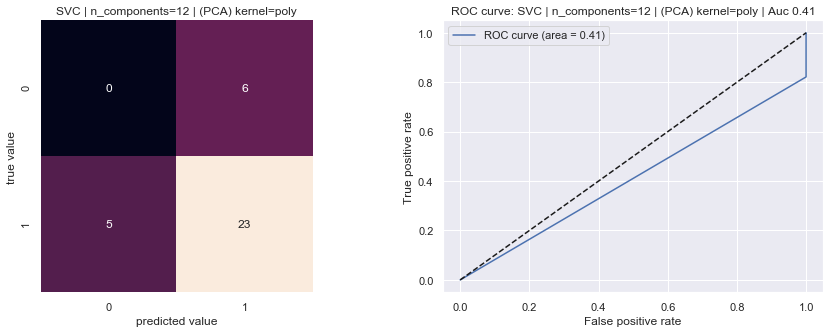

Kernel PCA: Rbf | SVC


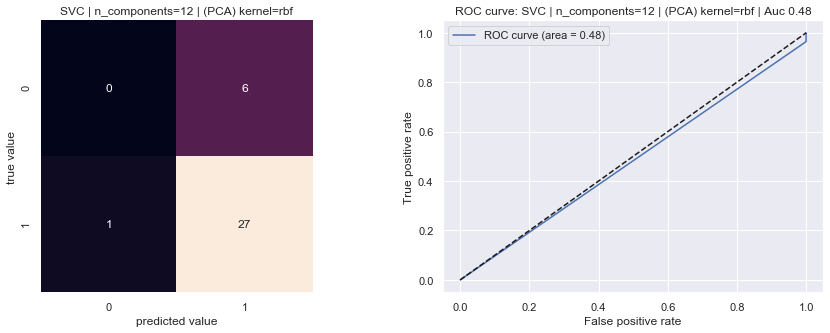

Kernel PCA: Cosine | SVC


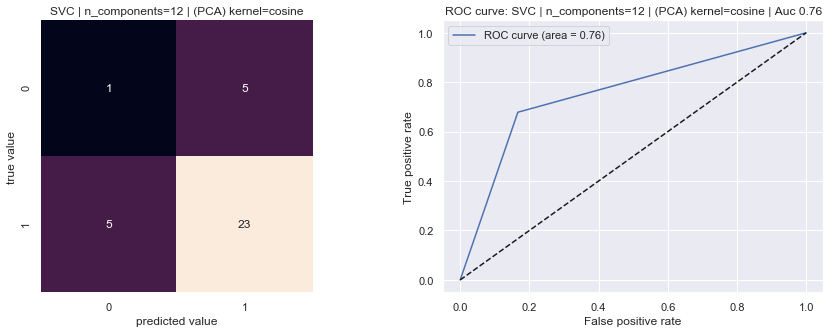

Kernel PCA: Sigmoid | SVC


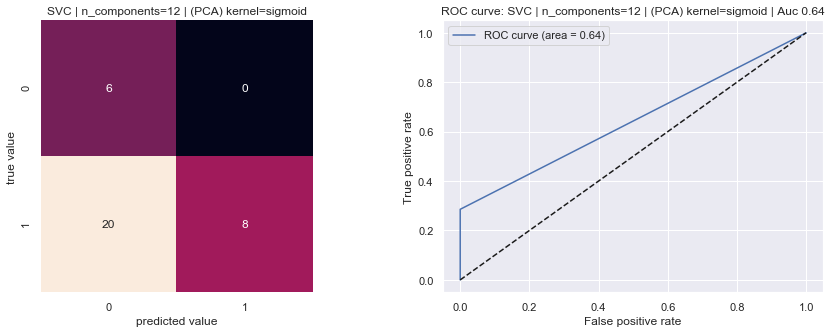

In [65]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_12, df_12_auc = pd.concat([df_12, df_gs], axis=0), pd.concat([df_12_auc, df_auc_gs], axis=0)
df_12 = merge_dfs_by_common_columns(df_12, df_gs)
df_12_auc = merge_dfs_by_common_columns(df_12_auc, df_auc_gs)

In [66]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Adopint more principal components we observe only a sligth improvement for cosine-trick kernel-Pca based Svm Classifier, since we reach up to .76 value for Auc score, however the improvement does not imply that we get a better result with a .5 threshold since we again faces a default model that is mostly focused on correctly classify instances from class 1 but at the same time wrongly predicted almost all the instances from class 0.

#### Advantages and Backwards of SVMs

Finally, I conclude this section providing a description of major advantages and backwards of such a machine learning technique, that have been noticed by researches who studied SVMs properties. The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

On the other and, the disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

### Decision Tree Models

Decision Trees, for short DTs, are a *non-parametric supervised learning method* used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Their mathematical formulation is generally provided as follows: Given training vectors $x_{i} \in R^{n}$, $i=1,…, l$ and a label vector $y \in R^{l}$, a decision tree recursively partitions the space such that the samples with the same labels are grouped together.

Let the data at node $m$ be represented by $Q$. For each candidate split $\theta = (j, t_{m})$
consisting of a feature $j$ and threshold $t_{m}$, partition the data into $Q_{left}(\theta)$ and $Q_{left}(\theta)$ subsets as:

\begin{align}\begin{aligned}Q_{left}(\theta) = {(x, y) | x_j <= t_m}\\Q_{right}(\theta) = Q \setminus Q_{left}(\theta)\end{aligned}\end{align}

The impurity at $m$ is computed using an impurity function $H()$, the choice of which depends on the task being solved (classification or regression) like:

\begin{align}
G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta)) + \frac{n_{right}}{N_m} H(Q_{right}(\theta))
\end{align}

Select the parameters that minimises the impurity: $\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)$.

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ until the maximum allowable depth is reached,
$N_m < \min_{samples}$ or N_m = 1.

Speaking about *Classification Criteria* referred to the procedure used for learining or fit to the data a decision tree we can state what follows: If a target is a classification outcome taking on values $0,1,…,K-1$, for node $m$, representing a region $R_{m}$ with $N_{m}$ observations, let $p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)$ be the proportion of class $k$ observations in node $m$.

So, Common measures of impurity are:
- Gini, specified as $H(X_m) = \sum_k p_{mk} (1 - p_{mk})$
- Entropy, definead as $(X_m) = - \sum_k p_{mk} \log(p_{mk})$

where, we recall that $X_{m}$ is the training data in node  $m$.

In [67]:
pos_cv = pos_cv +1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

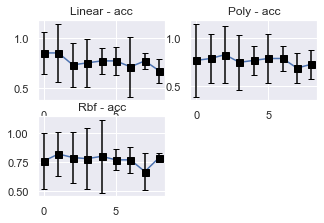

In [68]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grid Search Result

Kernel PCA: Linear | DecisionTreeClassifier


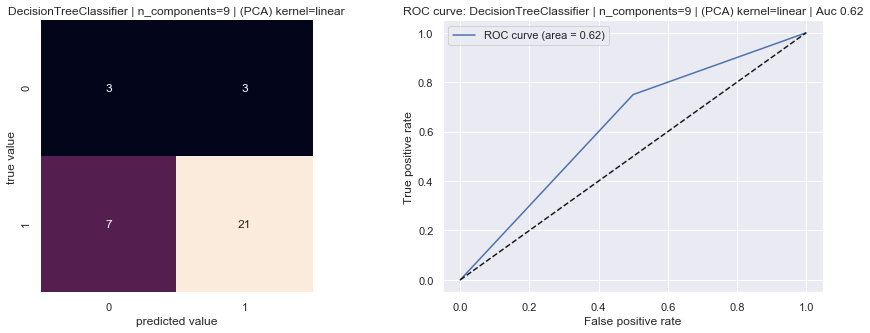

Kernel PCA: Poly | DecisionTreeClassifier


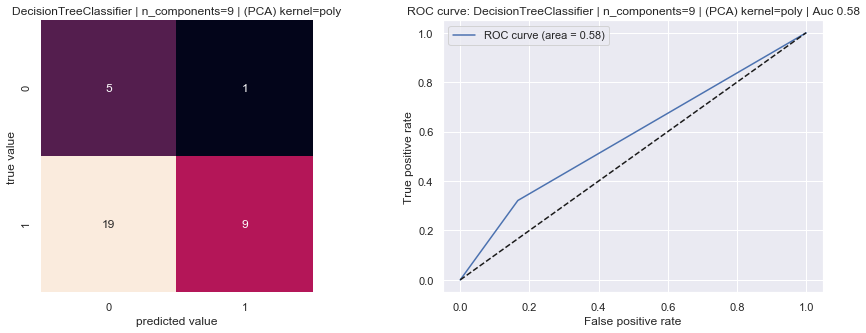

Kernel PCA: Rbf | DecisionTreeClassifier


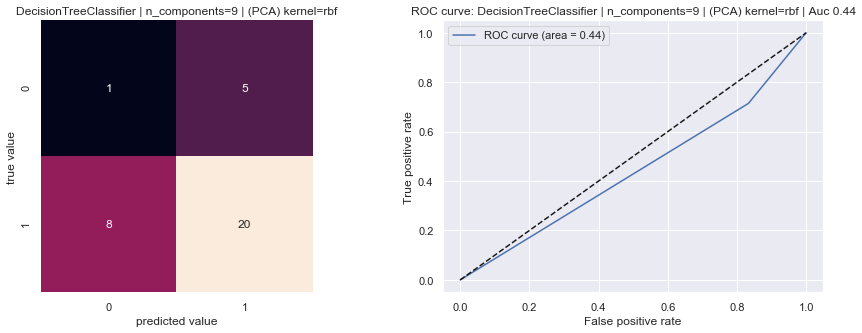

Kernel PCA: Cosine | DecisionTreeClassifier


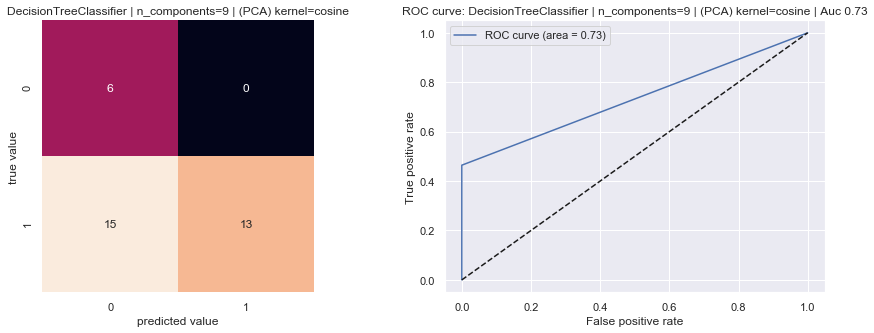

Kernel PCA: Sigmoid | DecisionTreeClassifier


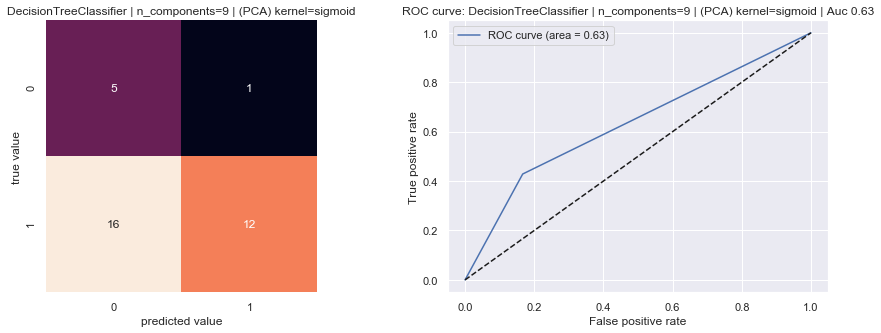

In [69]:
pos_gs = pos_gs + 1
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_9, df_9_auc = pd.concat([df_9, df_gs], axis=0), pd.concat([df_9_auc, df_auc_gs], axis=0)
df_9 = merge_dfs_by_common_columns(df_9, df_gs)
df_9_auc = merge_dfs_by_common_columns(df_9_auc, df_auc_gs)

Looking at the results obtained running grid-search algorithm applied to Decision Tree Classifier we can rougly saying that the different models will obtain performances with default classification thresholds that are not as good as the results obtained from previous models, also because the models do not show Roc Curve along with their corresponding Auc scores that enable us saying that such models can perform well during inference also varying the default threshold. In particular we can say what follows:
- looking at __Linear kernel-Pca based Decision Tree Classifier__, we notice that with the default threshold the model obtain high precision and recall for class 1 examples, meaning it is able to correctly classify most of the samples from class 1 as well as few examples from class 0 are exchanged as belonging to class 1. However speaking about class 0 we notice that we have obtained a vvery low precision and a 50 percent of recall that means that the model with default threshold misclassifyes half of the samples from class 0and we are not really sure that what we have classified as the class 0 instance it really belong to class 0. Finally looking at Roc Curve  we can observe that even from the very beginning the Sensitivity and 1-Specificity grow linearly with a slope value sligthly bigger than the slope of referring curve represented by Random Classifier, however at a given point the slope changes and as the thresholds approaches to higher values and the curve approaches to the top the slope decreases importantly, instead the value of Auc score account for 0.62.
- while looking at __Poly kernel-Pca based Decision Tree Model__, we can clearly understand that such a classifier is not good enough to be exploited for further inferences since it accounts for just .58 value of Auc score and observing Roc Curve we can conclude that it goes slightly better than the curve provided by random classifier. Moreover, the model when we adopt the default threshold seems to correctly classify most of the istances from class 0, but wrongly predict the class for instances of the opposite categories, in fact it is characterized from law precision referred to class 0, and since we want to correctly predict labels for both categories, here with such a classifier we are not able to satisfy such a constraint.
- the classifier corresponding to a __Rbf kernel-Pca based Decision Tree__, here is the model which leads to the worst performances, since the roc curve graphics is even worst than the random classifier and the roc curve accounts for a Auc score that is less than .5, more precisely just .44. So this result will be discarded, even if the model seems to correctly recognize samples from class 1 but wrongly predict labels for the class 0 samples, and again also here we have to state that we are not able to meet the constraint of correctly classify most of the data examples as we expect from a well defined classifier.
- referring to __Cosine kernel-Pca based Decision Tree Classifier__, when adopting a default threshold we notice that the model even if correctly classifyes all samples from class 0 leading to high recall for such a category, we can say also that the model has a low precision for class 0, meaning that the model confuses many samples from class 1 in fact is characterized from low value of recalll for the class 1, however when predicts a label equals to category one it is almost always sure about the choice. Thus, looking at Roc Curve and Auc score we can note that the model is characterized from a firt pahse in which the Sensitivityu and 1-Specificity are not growingf linearly following a line with a slope grerater than the one of Random Classifier as the preivous models, but rather is characterized by a interval of values as thresholds where just TPR is grwoing without let growing also FPR, than the Roc Curve follows another line with a lower slope which is lower also than the slope of Random Classifier. Instead the Auc gained is equals to .73 and for the Decision Tree classifiere is the highest value found amongst the trained models based on such a classifier.
- Lastly the __Sigmoid kernel-Pca based Decision Tree Classifier__, with a default threshold of .5 for classification shows slighlty better performance than the first classifier built for Decision Tree based models, that is the one which adopted lienar trick for kernel-Pca. In fact even if with a default threshold it was able to correctly classify most of class 0 examples, it keeps to wrongly predict the class label for examples from class 1, and for this reason that even changing the default threshold the Roc CUrve does not show a graphics with better performance and accounts for a Auc score just of .63.

In [70]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Looking at the table showna above and obtained running grid-search algorithm applied to Decision Tree Classifier, only two out of five classifier get significant accuracy values, and those are Decision Tree created by means of polynomial and Rbf-tricks adopted for kernel-Pca, since we reaches accuracy up to .92 and .89 percent, however we can think that also Decision Tree based on linear and cosine tricks for kernel-Pca allow for well-performing classifiers, while the Sigmoid trick adopted for kernel-Pca enables to model a Decision Tree that obtains an accuracy score lower than .8 percent.

The choice of kernel-Pca with a specific kernel-trick was decisive and affects the hyper-partameters set for building the models in almost all of the fine tuned hyper-params. However the gine index criterion was the most exploited and seems to work better than entropy for most of the classifiers except the Decision Tree that adopted a polynomial trick for doing kernel-Pca. While looking at the Splitter strategy, we can end up saying that the technique based on best-split seems to be the choiche that leads to better advantages during classification, since up to three out of five classifiers prefer it, however random-splitter allows to obtain a classifier that selecting it as the splitter strategy results into the model which lead to the highest Auc score amongst the models trained for Decision Tree classifier.

Kernel PCA: Linear | DecisionTreeClassifier


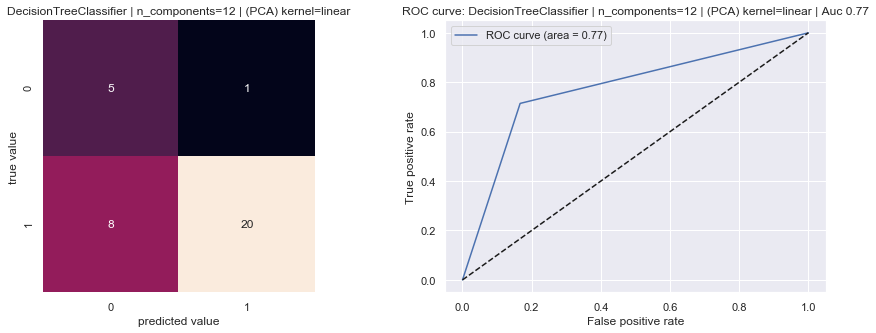

Kernel PCA: Poly | DecisionTreeClassifier


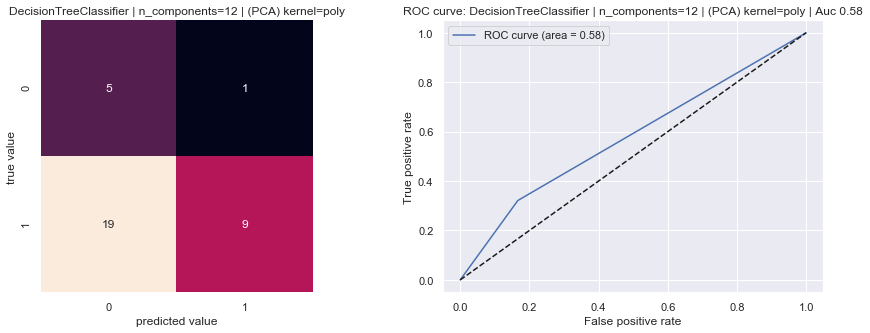

Kernel PCA: Rbf | DecisionTreeClassifier


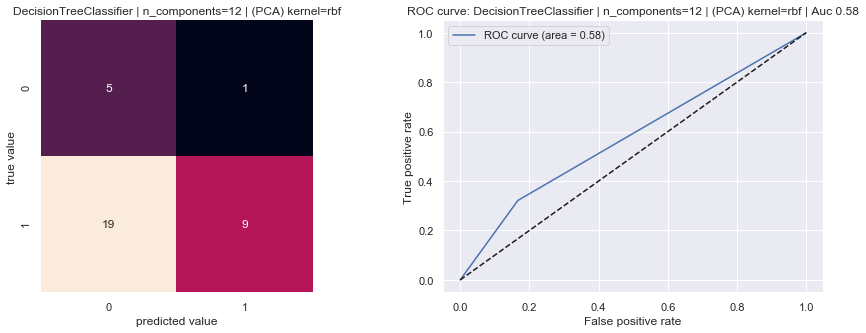

Kernel PCA: Cosine | DecisionTreeClassifier


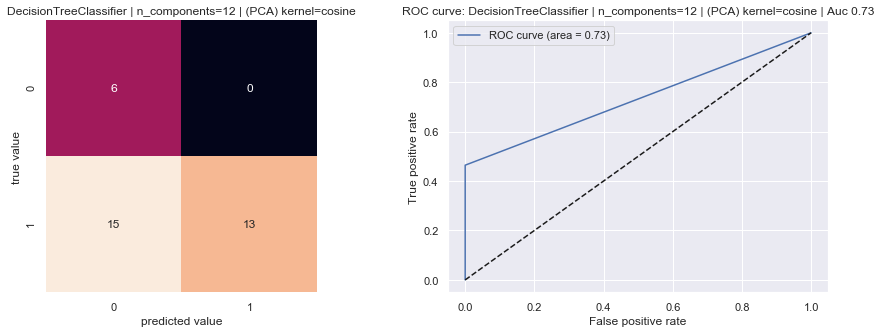

Kernel PCA: Sigmoid | DecisionTreeClassifier


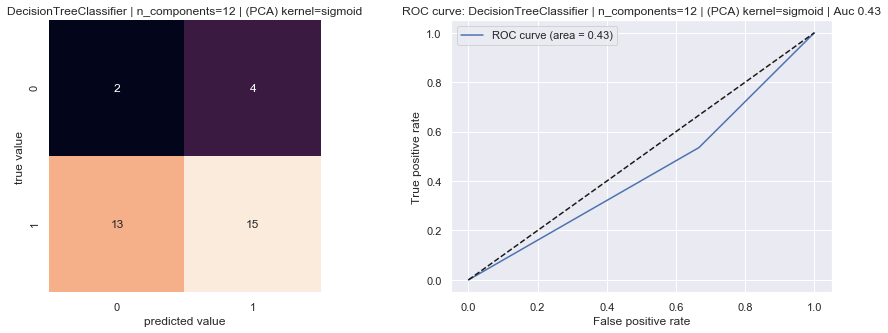

In [71]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_12, df_12_auc = pd.concat([df_12, df_gs], axis=0), pd.concat([df_12_auc, df_auc_gs], axis=0)
df_12 = merge_dfs_by_common_columns(df_12, df_gs)
df_12_auc = merge_dfs_by_common_columns(df_12_auc, df_auc_gs)

In [72]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

We observe, generally speaking that even if we provide more information taking into account more principal components we do not observe better improvements in the finasl models to think of folling the strategy of exploiting all the resouces in terms of informations for building our models.

#### Decision Tree's Advantages & Bacwards

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



### Ensemble methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:
- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. So, some examples are: Bagging methods, Forests of randomized trees, but still exist more classifiers;
- Instead, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Hence, some examples are: AdaBoost, Gradient Tree Boosting,but still exist more options.

#### Random Forests

The **sklearn.ensemble module** includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques, specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

The main parameters to adjust when using these methods is *number of estimators* and *maxima features*. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

Empirical good default values are maxima features equals to null, that means always considering all features instead of a random subset, for regression problems, and maxima features equals to "sqrt", using a random subset of size sqrt(number of features)) for classification tasks, where number of features is the number of features in the data. The best parameter values should always be cross-validated.

We note that the size of the model with the default parameters is $O( M * N * log (N) )$, where $M$ is the number of trees and $N$ is the number of samples.

### Cross-Validation Result

In [73]:
pos_cv = pos_cv + 1
# dfs_list[pos_cv].head(dfs_list[pos_cv].shape[0])
show_df_with_mean_at_bottom(dfs_list[pos_cv])

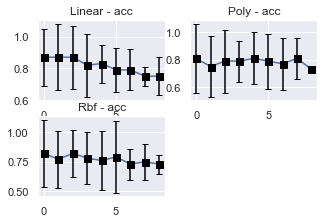

In [74]:
plot_name = plots_names[pos_cv]
show_learning_curve(dfs_list[pos_cv], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=grid_size, plot_name=plot_name)

### Grid-Search Result

Kernel PCA: Linear | RandomForestClassifier


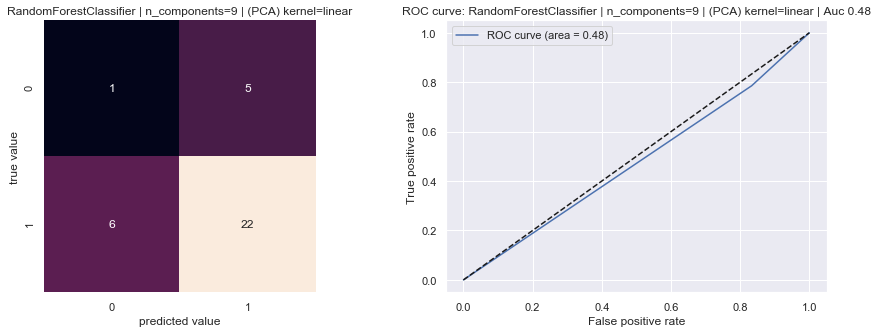

Kernel PCA: Poly | RandomForestClassifier


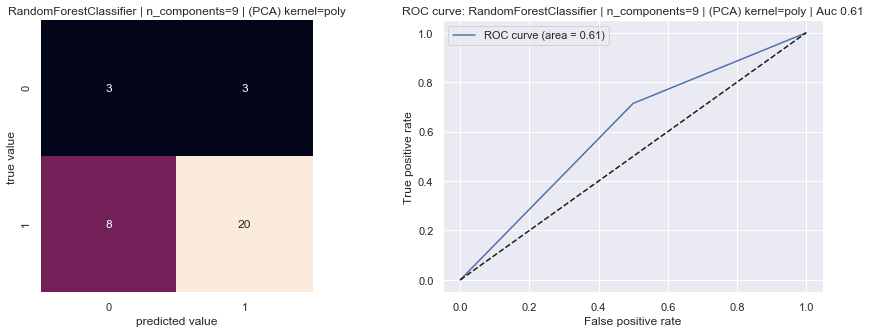

Kernel PCA: Rbf | RandomForestClassifier


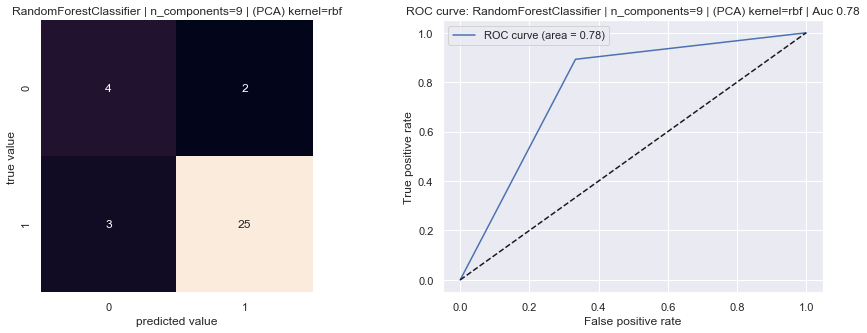

Kernel PCA: Cosine | RandomForestClassifier


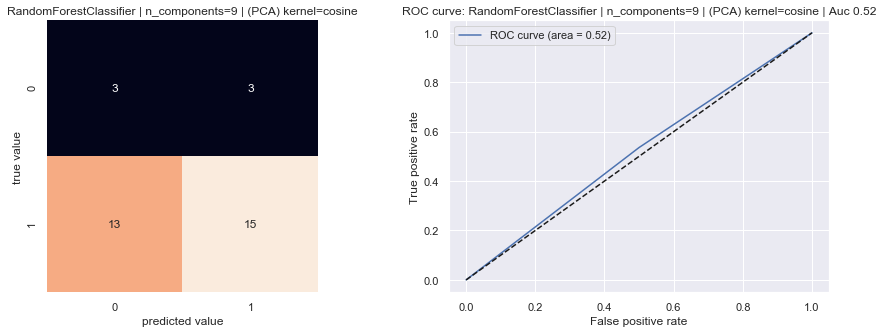

Kernel PCA: Sigmoid | RandomForestClassifier


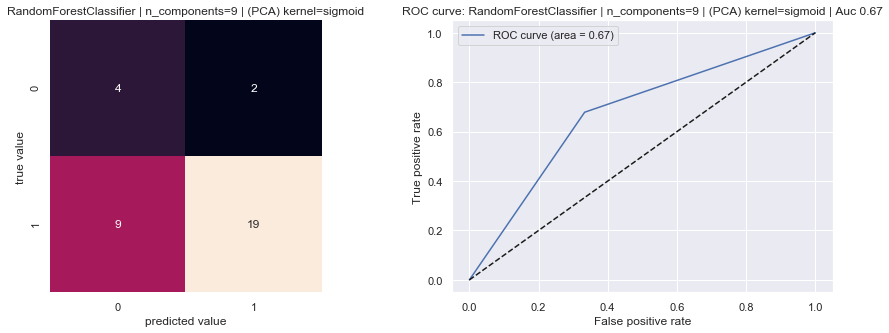

In [75]:
pos_gs = pos_gs + 1
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_9, df_9_auc = pd.concat([df_9, df_gs], axis=0), pd.concat([df_9_auc, df_auc_gs], axis=0)
df_9 = merge_dfs_by_common_columns(df_9, df_gs)
df_9_auc = merge_dfs_by_common_columns(df_9_auc, df_auc_gs)

The results collected when running Random Forest Classifier Algorithm as the ensemble method of choice here, by means of grid search approach wer can say, widely speaking, that only two out of five models lead to classifiers which are able to satisy our constrain of correctly classify the most of the samples coming from different classes that are class 0 and class 1. More precisely we can say what follows:
- Looking at __Linear kenrel-Pca baed Random Forest Classifier__, with a default threshld the model correctly classifyes all instances from class 1 but wrongly predicts labesl for instances from class 0 and so results into a model with a high recall and low precision for class 1, and a low recall as welll as low precision for class 0. Moreover modifying the default threshold we dono not observe looking at Roc Curve an improvement in the classification capability of the model, the evidence is also suggested by the fact that we do not obtainm a Auc score higher than .5 which is the referring score related to the Random Classifier, this means that such a model should be ignored and not employed.
- instead lookinga at __Poly kernel-Pca based Random Forest Classifier__, with a default threshold of .5 the model allows to correctly classify most of the samples from class 1 but we correctly classify just half of the samples that instead belon to the class 0, so the model has high recall and preicision for class 1 but low precision and a recal of 50 percent for class 0. While lookng at Rocu Curve it shows us that the model for a first range of thresholds has both TPR and FPR metrics that grow linearly with a slope higher than the slope used by lien of Random Classifier, however after a given point the slope changes and decreaes to a value lower than 0.5, meaing that in the first range chanign the threshold the model seems to gain grower TPR than FPR, after the the FPR is increasing more significantly than the TPR and so we do not have to select thresholds too much high. However the model get a Auc Score of .61 that is not so greater than .5 and so also such a model is not really well performing.
- while, speaking about __Rbf kernel-Pca based Random Forest Classifier___, with a default thresold of .5 allows for a model wich reaches a Auc Score of .78 which is the highest score amongs the Random Forest Classifiers built here in this section. Morevore, it allows us to obtain a model wich correctly classify most of the class 1 instances in fact we get high precision and higfh recall so we also have a model that misclassify few instances from class 0. Alos looking at the Roc Curve we can notice that for a very large set of thresholds the TPR metric grows faster than the FPR metric than the model for high thresholds seems to let FPR to grows much faster than TPR, however this trial leads to a classifier that could be righltly selected for predicting the samples from different classes, because shows us really good performance.
- referring to the __Cosine kernel-Pca based Random Classifier__, we can quickly say that sucha a classifier is slighlty better than the one obtained still for Random Forest Classifier but with a linear trick for kernel-Pca, in fact the Auc score is higher than the latter model but is just slighly higher also than the Random Classifier, so we end up saying that such a configuration do not lead to a model that we want to exploit for classification. The main reason is that we have wrongly predicted the class label for half of class 0 examples as well as we have wrognly assigned labels to class 1 samples in huge number so that the model results with a low value of precision related to class 0.
- Lastly, __Sigmoid kernel-Pca based Random Classifier__ with a default .5 threshold leads to model with a very high precision and a middle recall for class 1, instead we obtain a middle recall and low precision for class 0, so we correcly classify more or less a little bit more samples from class 0, but even if the number of wrongly classified examples from class 1 is not huge it is a value comparable to the number of correctly classified claas 0 exmaples so that the precision goes down. Howqever the model allows for a roc curve that obtain a score of .67 the second score for Random Forest Classifier even if the accuracy obtained from the model is only the third amongst Random Forest classifier.

In [76]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Looking at the table reported above for Random Forest Classifiers we can noticed that the three out of five classffiers that are linear, polyomial and sigmoid-trick kernel-Pca based models do not adopt a boostrap approach, while Rbf and Cosine trick kernel-Pca based Random Forests decided to adopt such a strategy to get better results during inference. While the gini index criterion was mostly preferred than entropy, in fact the latter was adopted just from sigmoid kernel-Pca based model. Finally the number of estimators adopted from the different models varyes from model to model, in fact we can see that three out of five cases the number of estimators was lower than 10 estimators, while there are two cases in whihc we exploit 50 and even hundered of estiamtors to be able to correctly classify samples.

Kernel PCA: Linear | RandomForestClassifier


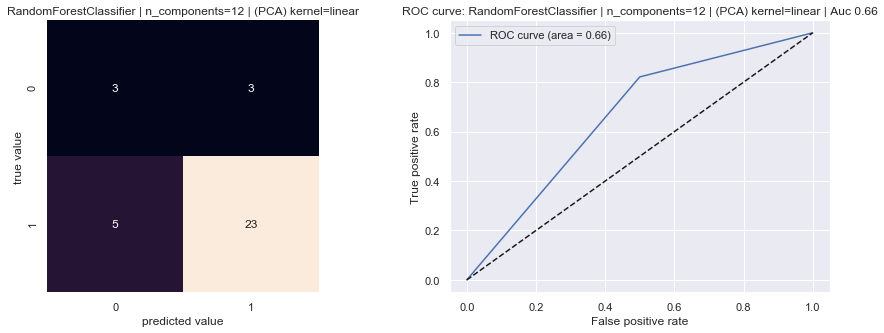

Kernel PCA: Poly | RandomForestClassifier


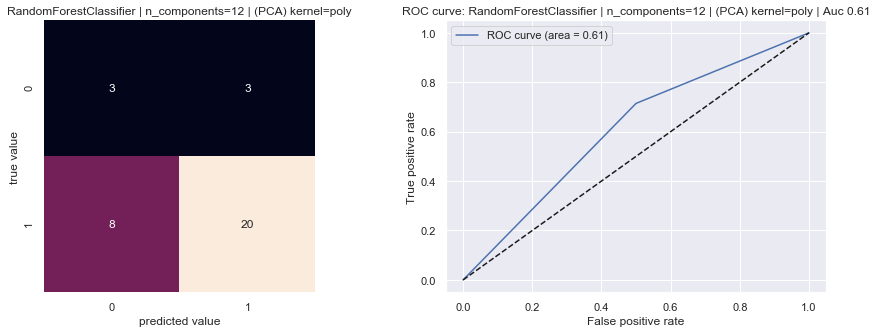

Kernel PCA: Rbf | RandomForestClassifier


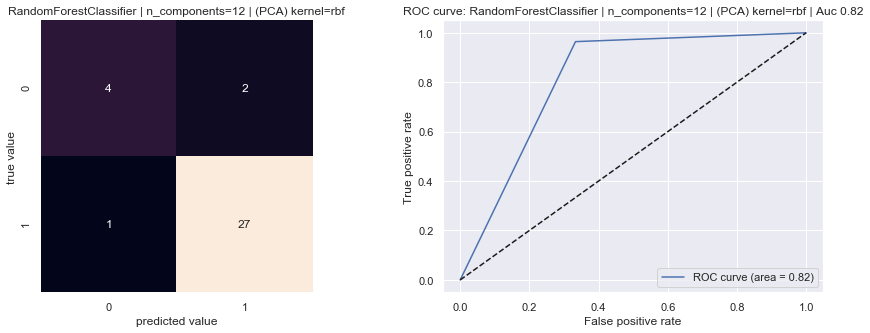

Kernel PCA: Cosine | RandomForestClassifier


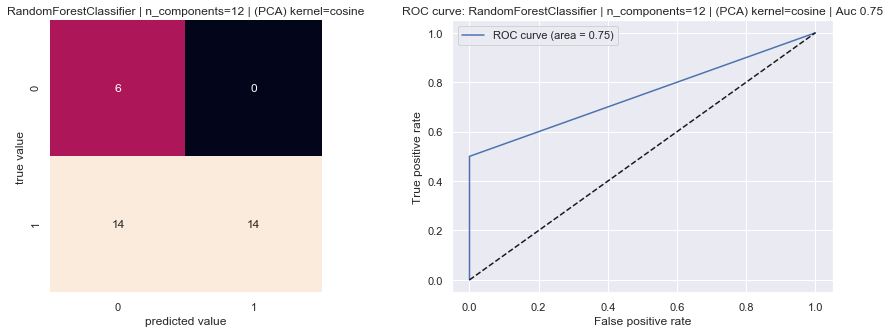

Kernel PCA: Sigmoid | RandomForestClassifier


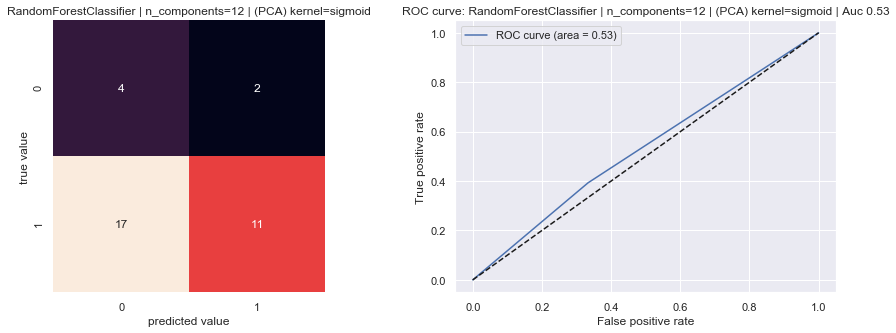

In [77]:
plot_dest = os.path.join("figures", "n_comp_12_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[pos_gs+1], \
    param_grids=param_grids[pos_gs],
    estimators_names=estimators_names[pos_gs+1], \
    X=X, y=y,
    n_components=12,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
# df_12, df_12_auc = pd.concat([df_12, df_gs], axis=0), pd.concat([df_12_auc, df_auc_gs], axis=0)
df_12 = merge_dfs_by_common_columns(df_12, df_gs)
df_12_auc = merge_dfs_by_common_columns(df_12_auc, df_auc_gs)

In [78]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Once also runned random forest classifiers with cross validation technique when we exploit all the information available from taking into account all the Principal components we can observe that three out of five trials have improved scores related to Auc which may lead to think that the models which adopt Linear, Rbf and Cosine tricks for kernel-Pca unsupervised methods may lead to better models to be preferred to the previous models that instead exploited up to 9 principal components.

## Summary Results

### Summary Tables about Analyses done by means of different number of included Pricipal Components

In [85]:
df_9_, df_12_ = reshape_dfs_acc([df_9, df_12], num_col=N_KERNEL, n_cp_list=[9, 11])
res = create_widget_list_df_vertical([df_9_, df_9_auc])
display.display(res)
res = create_widget_list_df_vertical([df_12_, df_12_auc])
display.display(res)

### Summary Test

Here, in the following section I'm going to emulate a test in which I will test the different possible kinds of kernel trick, in other sense techniques, available for a Principal Component Analysis, shortly PCA, unsupervised statistical learning technique in order to remap the original features into a new N-dimensional reference system by means of the kernel approach adopted during the computation.

Once the new N-dimensional feature space is available and ready, I will experiment a bounch of selected machine learning methods and procedures applied directly on the first two most informative principal components, that is, also referred to as PCA1 and PCA2, respectively, in order to display a sequence of decision boundaries and contours retrieved after having runned each method on the selected dataset, which has been divided into halves, ofd the same size, and with the same proportion of the two classes of the target variable.

What follows is the related code, to the desciption given just above, and the results are also available through several rows of images that represent the contour and decision boundaries obtained thank to the several combinations of PCA's kernel trick and machine learning method for fitting a classifier:

In [ ]:
kernel_pca = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid'] # linear, poly, rbf, sigmoid, cosine, precomputed
scaler_techniques = ['StandardScaler', 'Normalize', 'MinMaxScaler']

err_list = classifier_comparison_by_pca_kernels(
    X, y,
    start_clf=0, stop_clf=10,
    scaler_technique=scaler_techniques[0],  # Trying only StandardScaler approach
    straitified_flag=True, kernels_pca_list=kernel_pca[:],
    figsize=(27, 9), by_pairs=False, singles=False,
    verbose=0, record_errors=True, avoid_func=False, 
)

Describing the several pictures we have obtained throughout the combination of kernel tricks available for kernelPCA technique together with different supervised machine learning techniques for building classifiers and models, we can end up saying what follows.

Looking at the first picture of each row of graphs, that is those pictures showing just data points witout any kind of decision regions as well as decision boundaries, what we understand is that the data points that are the data examples will group creating different shapes accordingly to the kind of kernel trick adopted for kernelPCA method, in particular, we can immediately see that the two categories, where blue points stands for THROUGH-like bridges while red points for DECK-like bridges, are not equally in numbers, but blue points are the greater among the two, moreover the two categories does not seem to seaprate very well but the picture is crowded with both types of categories that are strctlu closed one another. More precisely we can see that:
- using *linear* kernel trick for kernelPCA procedure data points seem to be widely spread along vertical axis, and group mostly near the center of the picutre;
- using *poly* kernel trick for kernelPCA procedure instead data points are mostly clusterd near the left bottom corner where seem to form a straight line and there are few examples on the upper side and some less points on the right side of the sdame picture;
- while using *rbf* kernel trick for kernelPCA procedure data points seem to spread as the data points represented in the first picture so in the middle of the area but are tightly related so that are less spread along the horizontal axis;
- when exploiting *cosine* kernel trick for kernelPCA method the data points are widely spread and tend to reach the top of the picture;
- fianlly, when adopting *sigmoid* kernel trick for kernelPCA we can see that data points are mostly clusterd in the center of the graph.

Speaking about decision boundaries and decision regions about the selected and fitted to the data machine learning methods, what we can say is the following:
- Looking at **Nearest-Neighbor Method** graphs for describing decision boundaries and decision regions we notice that in the majority of cases the decision boundaries and decision regions are prominent for the THROUGH-like bridges, sometimes the area referring to DECK-like samples are sourranded by the decision regions of the other class and the transition to the two decision boundaries is very sharp, not easilly describable.
- While, looking at **Linear SVM Classifier**, and knowing the fact that we are fitting a linear classifier to the data, we are aware and so it's clear that the expected decision regions follow a pattern made from several strips of shifting shades of colors from dark red to dark blue. More precisely, three out of five Linear Svm classifiers, in paritcular those that correspond to classifiers fitted when kernel trick for Kernel PCA was set to *'rbf', 'cosine', 'sigmoid'* respectively and one at a time, show more or less the same pattern, so this classification technique combined with these kernel tricks for KernelPCA seems to behave more or less at the same way. Instead Liner Svm combined with poly kernel trick seems to lead the classifier and the resulting decisin boundaries to follow a symmetric patter with respect to the vertical axis. Finally the first combination of KernelPca and Linear Svm technique, that is linear kernel trick plus linear svm, leads to a less aggressive or finer slope of the linear decision regions. We can end up saying that in the majority of cases the transition from one extreme or edge to the other of the shade of color is smoother and continue with respect to the Nearest-Neighbor Approach.
- Speaking about **RBF kernel SVM** combined with a preprocessed datset with the various kernel tricks for kernelPca Procedure we can observe that the attempt of finding decision regions on one side advantages the more numerous class that is the class corresponding to those data points classified as THROUGH-like bridges, while penalize the other which is referred to smaller region. However it seems that the classifieris able to correctly classify the data points corresponding to the less numerous class while the data points of the other class sometimes are misclassified more frequently.
- Looking at classifiers trained by means of **Gaussian Process technique** we can ascertain that decision boundaries and decision regions seem to follow a straight pattern where the data points are mixing the most, while far from the bigger cluster of points that come from both categories the decison boundaries are assuming higher order so that resemble smooth nonlinear curves. In particular while in all other cases the blue region seems to occupy the left side of the graph, sometimes near the bottom and other times near the top-right, for Gaussian Process technique combined with sigmoid kernel trick for kernelPca procedure we observe that the pattern observed above is the opposite.
- Even if these three methods have different characteristics they seems to lead to or provide more or less, and somehow, resulting decision boundaries and decision regions that follow a similar nature that is regions obtained dividing the available two-dimensional plane into subregions that corresponds to square regioons or alternatively irregular regions that are not corresponding to some kind of curve but rather to segmentation of the available area. These methods are respectively **Deciosn Trees, Random Forests, and Adabosts**. Where the two latter can be seen as a improvement of Decsion Tree because often the two latter are based on the decision tree classifier as unit of the overall classifier as are generally described Random Forests, and AdaBost. However Adabost and Random Forests seem to beahve more or less in the same way, in the sense that both show a predominance of reagins and subregions linked to the THROUGH class, even if the transition from one region to the other is mcuh smoother than the transition of the Decision Tree based models.
- The **Niave Bayes Classifier**, when applied to the data points once preprocessed using one at a time all the suggested kernel tricks for kernelPca method as a classifier technique, leads to a results in terms of decision boundaries and regions that vary the most from one kernel trick to the other. In particular using the first three proposed kernel tricks that are 'linear', 'poly', 'rbf' the decison regions connected to the Deck-like bridges are concentric with respect to the surrounding area that instead is widely associated to the other class that is THRROUGH-like bridges. More Precisely for 'linear' kernel the resulting decision boundaries are wide and spread along the vertical axis instead for 'poly', 'rbf' tend to be narrowe and to be located near the bottom of the graphic. Instead looking at the graphic that referes to the data points when preprocessed by means of cosine kenrel trick for kernelPca method we notice that it seems to lead to a opposite or simmetryc graphic with respect to the horizontal axis when compared with the graphic obtained by means of linear kernel trick. Lastly the sigmoid kernel trick leads to a graphic that seems to classifies data points from THROUGH class associating them to the left and right sides of the piciture while the top and bottom centered horizontal strip seems to be associated with data points from DECK class and more precisely the dark red areas are spotted mosty near either the top or bottom areas.
- The last classifier proposed for this thiny and rough experiment is he one known as **Quadratic Discriminant Analysis**, or more shortly *QDA*. The resulting graphics suggest us that by means of such technique we observe that the DECK class is the class among the two which affects mostly the models capabilites, since the decision regions are mostly represented by shades of colors that range in the majority of case around the red color, enabling us to summarize that the DECK class differently from other preceding models will be the most frequently predicted class with respect to the other class that is the THROUGH class.

Having performed the analyses discussed just above, employing graphics and so qualitaty approach for investigating some of the most known and exploited methods we can summarize that since we adopt jsut two PCS out of eleven possible components for predicting classes among DECK and THROUGH for T-OR-D dependent variable as our predictive or target variable, is is reallyu difficult to correctly classify all the majority of the data samples since the decisoin bundaries vary heavily from one method to the other also due to the fact that we exploit few information and knwoledge and we cannot find patterns that lead to a more precise classification. We need to exploit more features to reach better performance at classification time and find better decision boundaries that allow to separate the data points without mixing them.

### Improvements and Conclusions <a class="anchor" id="Improvements-and-conclusions"></a>

Extension that we can think of to better improve the analyses we can perform on such a relative tiny dataset many include:
- Selecting different *Feature Extraction ant Dimensionality Reduction Techniques* other than Pca or kernel Pca such as:  *linear discriminant analysis (LDA)*, or *canonical correlation analysis (CCA) techniques* as a pre-processing step.

### Main References  <a class="anchor" id="references"></a>
- Data Domain Information part:
    - (Bridge) https://en.wikipedia.org/wiki/Bridge
    - (Deck) https://en.wikipedia.org/wiki/Deck_(bridge)
    - (Cantilever bridge) https://en.wikipedia.org/wiki/Cantilever_bridge
    - (Arch bridge) https://en.wikipedia.org/wiki/Deck_(bridge)
    - (Through Vs Deck) https://sites.google.com/site/trussbridgedesignproject/trusses
- Machine Learning part:
    - (Theory Book) https://jakevdp.github.io/PythonDataScienceHandbook/
    - (Decsion Trees) https://scikit-learn.org/stable/modules/tree.html#tree
    - (SVM) https://scikit-learn.org/stable/modules/svm.html
    - (PCA) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    - (Learning Curve) https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
- Statistics:
    - (Correlation and dependence) https://en.wikipedia.org/wiki/Correlation_and_dependence
- Chart part:
    - (Seaborn Charts) https://acadgild.com/blog/data-visualization-using-matplotlib-and-seaborn
    - (Correlation Matrix) https://www.displayr.com/what-is-a-correlation-matrix/
- Markdown Math part:
    - https://share.cocalc.com/share/b4a30ed038ee41d868dad094193ac462ccd228e2/Homework%20/HW%201.2%20-%20Markdown%20and%20LaTeX%20Cheatsheet.ipynb?viewer=share
    - https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    
#### Others  References
- Ipython Doc:
    - (Main) https://ipython.org/ipython-doc/3/index.html
- Plots:
    - (Python Plot) https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=1008025&gclid=Cj0KCQjw-_j1BRDkARIsAJcfmTFu4LAUDhRGK2D027PHiqIPSlxK3ud87Ek_lwOu8rt8A8YLrjFiHqsaAoLDEALw_wcB
- Third Party Library:
    - (statsmodels) https://www.statsmodels.org/stable/index.html#
- KDE:
    - (TUTORIAL) https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
- Metrics:
    - (F1-Accuracy-Precision-Recall) https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c